In [55]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #not used
from scipy import signal
import pywt  #not used



**1. Data download and preprocessing**

1.1 Data cleaning and understanding

Reading the EEG data from the provided four electrodes by running the file collected during the long blink and short blink session with equal length (510 points pro session). Conduct the preliminary data processing and visualization steps to gain some insight from the EEG recording:
- Splits and clean the data
- Selects the first 510 points for visualization

Clarifying the following questions with the professors

1. Are the amplitude value measure as microvolt? This information was not given
2. Are the index time series? If yes issit in seconds or milliseconds? Sampling frequency is 215 Hz at 2 seconds
3. What does 510 points pro session mean? It is an arbitrary decision from the data manager
4. Do we need more information about the four electrodes? No further knowledge is required

1.2 Load data, and parsing it from string to appropriate data type. Then, select the first 510 points for visualization.

Text(0.5, 1.0, 'The first 510 points of Long Blink')

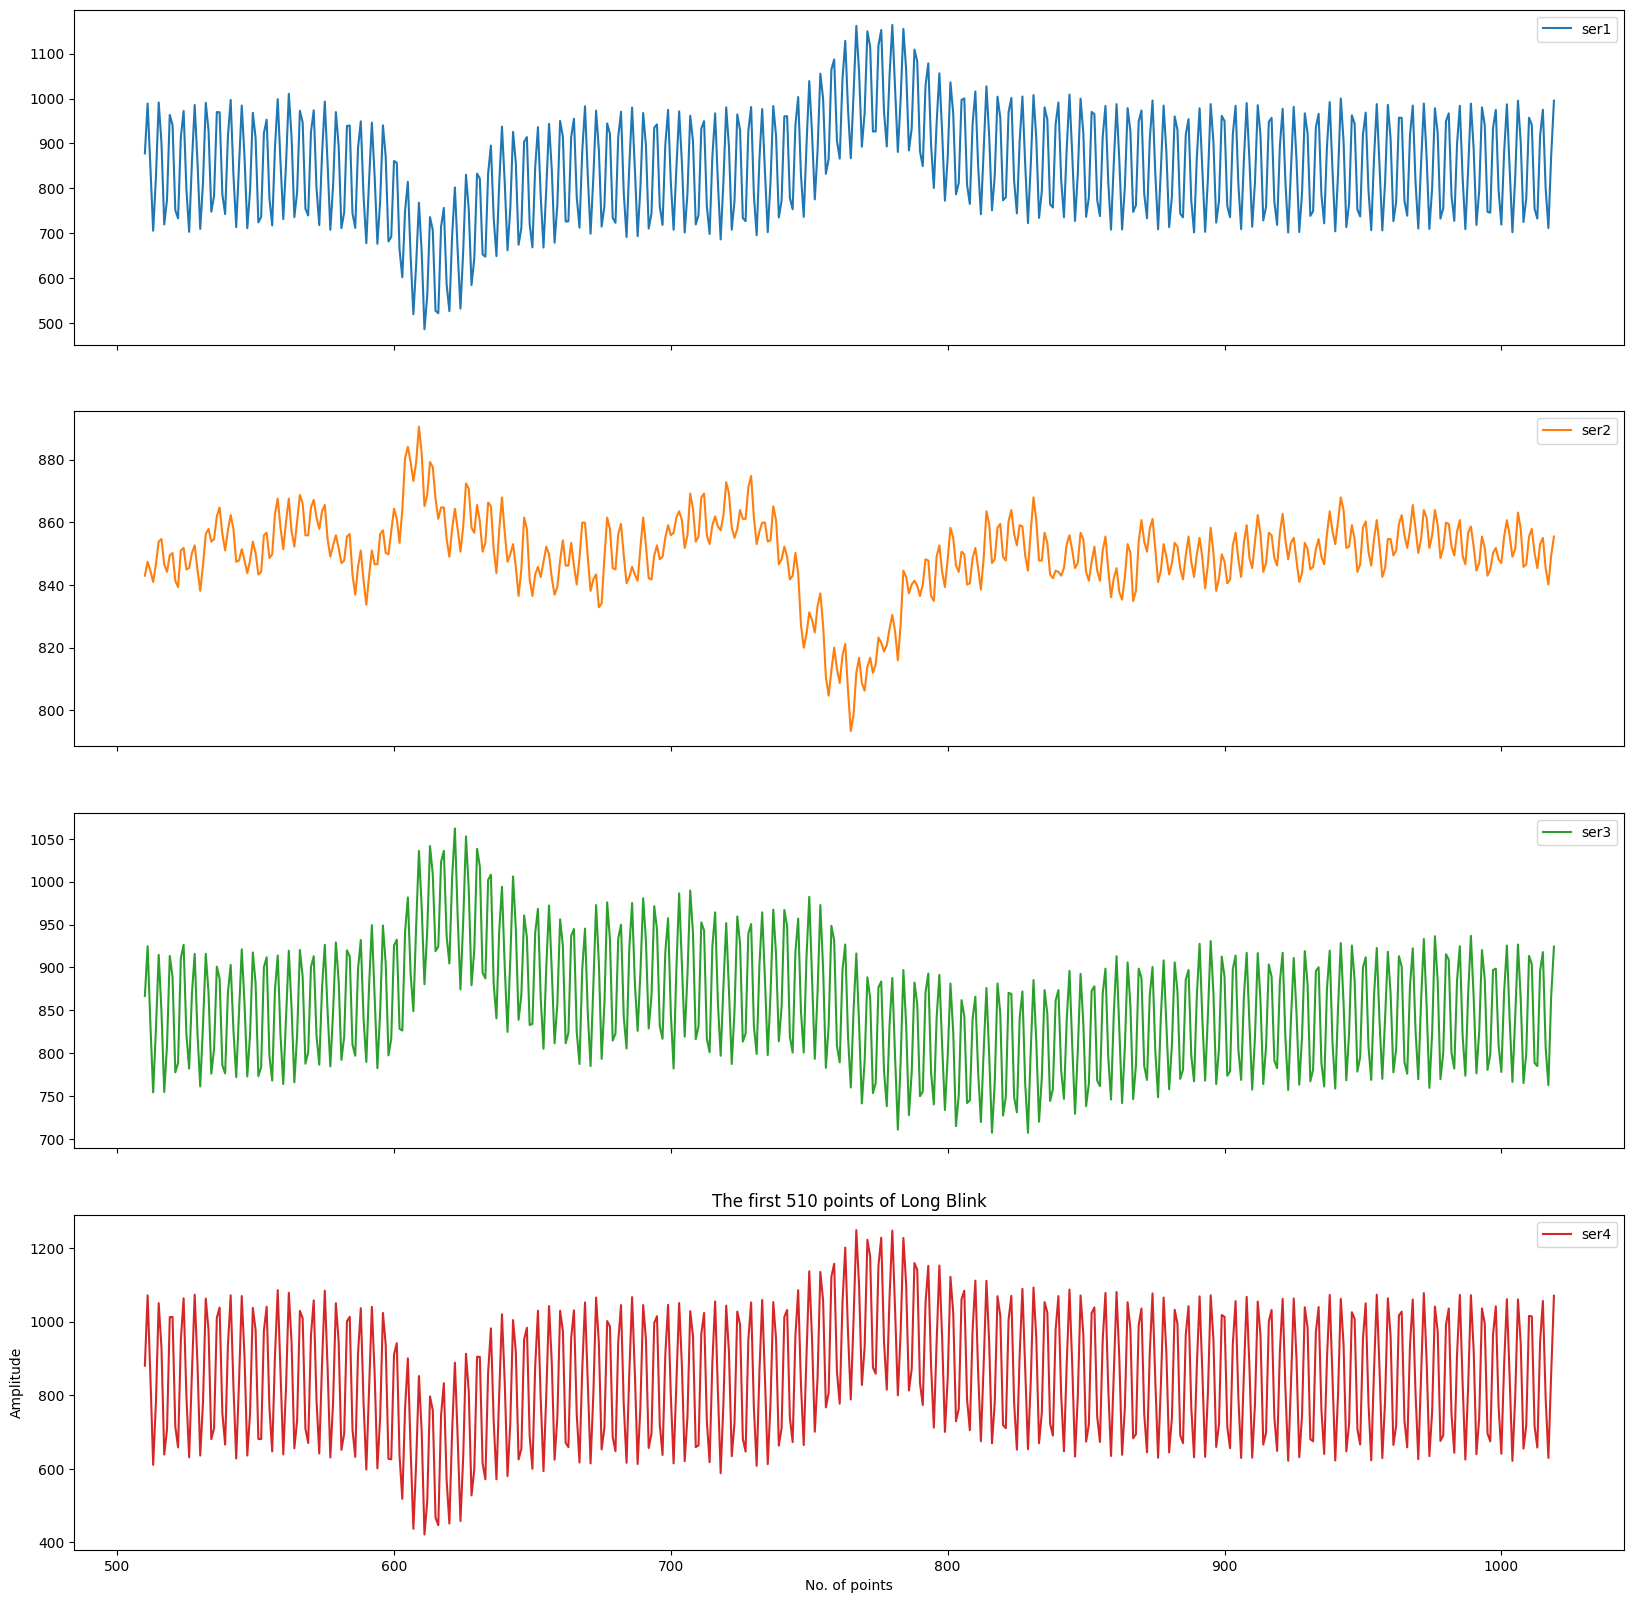

In [56]:
# Long blink data
df1 = pd.read_csv('data\\LongBlink.csv', sep = ",")
df1[['Col1', 'Col2', 'Col3', 'Col4']] = df1['data'].str.split(',', expand=True)
# Remove the original 'HeaderColumn' column
df1.drop(columns=['data'], inplace=True)
df1.head(5)
ser1 = df1.iloc[:,0].str.strip('[').astype(float) #to remove square brackets and convert to float
ser2 = df1.iloc[:,1].astype(float) #convert to float
ser3 = df1.iloc[:,2].astype(float) #convert to float
ser4 = df1.iloc[:,3].str.strip(']').astype(float) #remove square brackets and convert to float
# ser 1,2,3,4 are numpy arrays, length: 25500, dtype: float64
df1 = pd.concat([ser1, ser2, ser3, ser4], axis=1) #concatenate the columns
df1.columns = ['ser1', 'ser2', 'ser3', 'ser4'] #rename the columns
# Extract the first 510 points of the data as sample and visualize it
df1_sample = df1.iloc[510:1020] 
df1_sample.plot.line(subplots=True, figsize=(20, 20))
plt.xlabel('No. of points')
plt.ylabel('Amplitude')
plt.title('The first 510 points of Long Blink')
#print(ser1[0])

**1. Data download and preprocessing**

1.3 Data format compatibility
In this step, the MNE-Python package is used for analysis. MNE is an open source tool for exploring, visualizing, and analyzing human neurophysiological data, such as EEG. A .fif file needs to be generated from csv to fit the raw data format used in this package for analysis.

1.4 Scaling the value 

"A healthy human EEG displays a certain pattern of activity correlate with how awake a person is. The range of frequencies observed are between 1 and 30 Hz, with amplitudes vary between 20 and 100 μV". However, the raw signals of the four electrodes provided exhibit different magnitude range, ("500 - 1100" or "400 - 1200"). 

The objective here is to standardize the magnitude of the variations in the raw signale from the four electrodes into a consistent range between 20 and 100 μV. Standardizing the range helps to achieve consistent and comparable magnitudes across the electrodes. Additionally, scaled data of similar amplitudes can lead to better convergence and efficient training for machine learning. 

Here, min-max scaling is applied to rescale the raw signal values to the desired range between 20 and 100 μV.
Transposing the DataFrame is done to ensure that each row corresponds to a specific time point, which aligns with the typical structure of time-series data. 

***Glossary***
- μV : symbol for microvolts

***Source***
- https://en.wikipedia.org/wiki/Electroencephalography#:~:text=A%20healthy%20human%20EEG%20will,between%2020%20and%20100%20%CE%BCV 

***Source code***
-  https://colab.research.google.com/drive/1ro2XBhpUKIlV5JCytetKoNFrVOCgdLAP?usp=sharingLink#scrollTo=T4VzMOJKSXlz
-  https://mne.tools/dev/auto_tutorials/preprocessing/10_preprocessing_overview.html



In [57]:
import mne
from sklearn.preprocessing import MinMaxScaler

n_channels = len(df1.columns) #define number of channels
print(n_channels)
ch_names = list(df1.columns) #list of channel names
print(ch_names)

#Min-max scaling
scaler = MinMaxScaler(feature_range=(0.000020,0.000100))
df_scaled = scaler.fit_transform(df1.to_numpy()) 
df1_norm = pd.DataFrame(df_scaled, columns=df1.columns)
print(df1_norm.head(5))
values = df1_norm.T # transpose the dataframe
ch_types = ['eeg']*df1.shape[1]
sampling_freq = 215 

info = mne.create_info(ch_names=ch_names, sfreq=sampling_freq, ch_types=ch_types)
raw_lb = mne.io.RawArray(values, info)

raw_lb.save('.\\data\\raw_lb.fif', overwrite=True)
print(values)

4
['ser1', 'ser2', 'ser3', 'ser4']
       ser1      ser2      ser3      ser4
0  0.000058  0.000062  0.000049  0.000059
1  0.000046  0.000057  0.000036  0.000041
2  0.000060  0.000060  0.000055  0.000059
3  0.000076  0.000065  0.000070  0.000081
4  0.000064  0.000061  0.000055  0.000067
Creating RawArray with float64 data, n_channels=4, n_times=25500
    Range : 0 ... 25499 =      0.000 ...   118.600 secs
Ready.
Overwriting existing file.
Writing d:\FHNW_Medical_Informatics\Python\Python_Learn\EEG\data\raw_lb.fif
Closing d:\FHNW_Medical_Informatics\Python\Python_Learn\EEG\data\raw_lb.fif
[done]
         0         1         2         3         4         5         6      \
ser1  0.000058  0.000046  0.000060  0.000076  0.000064  0.000045  0.000054   
ser2  0.000062  0.000057  0.000060  0.000065  0.000061  0.000057  0.000060   
ser3  0.000049  0.000036  0.000055  0.000070  0.000055  0.000035  0.000047   
ser4  0.000059  0.000041  0.000059  0.000081  0.000067  0.000041  0.000050   

        

C:\Users\charl\AppData\Local\Temp\ipykernel_48904\2712911562.py:21: RuntimeWarning: This filename (d:\FHNW_Medical_Informatics\Python\Python_Learn\EEG\data\raw_lb.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_lb.save('.\\data\\raw_lb.fif', overwrite=True)


**1. Data download and preprocessing**

1.5 Artifact detection

MNE-Python includes tools for automated detection of certain artifacts such as blinks; one can always visually inspect the data to identify and annotate artifacts as well. Before looking at artifacts, SSP projectors is set aside in a separate variable and then remove them from raw object using del_proj() method so that the data can be inspected in its original, raw state. Signal-space projection (SSP) is a technique for removing noise from EEG signals by projecting the signal onto a lower-dimensional subspace. 

In [58]:
ssp_projectors = raw_lb.info['projs'] 
raw_lb.del_proj() #use to remove SSP projection vector

<RawArray | 4 x 25500 (118.6 s), ~806 kB, data loaded>

**1. Data download and preprocessing**

1.6 Apply low-frequency drifts

Low-frequency drifts are most readlily detected by visual inspection using the basic plot() method, it is helpful to plot a relatively long time span and to disable channel-wise DC shift correction. Here, 2 seconds is plotted. 

It is observed that there are approximately 12 pulses occuring every 0.25 seconds. This pattern results in around 50 pulses per second, corresponding to a frequency of 50 Hz. Then the power spectral density is applied to unveil the distribution of power across various frequencies in the EEG signal. 

Given this observation, it is planned to apply a notch filter later, which is commonly use to eliminate specific inteferences frequences such as power line noise. The goal is to mitigate pertubations caused by unwanted frequency in the data. 

***Glossary***
- Direct current (DC) shift, also called infraslow activity (IFA), refers to brain activity slower than 0.5 Hz.

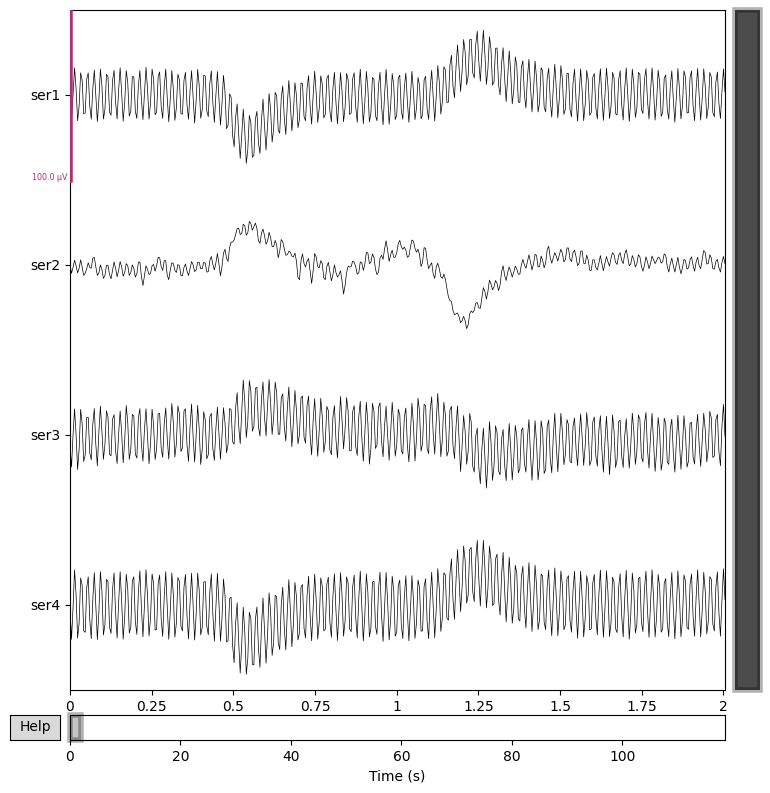

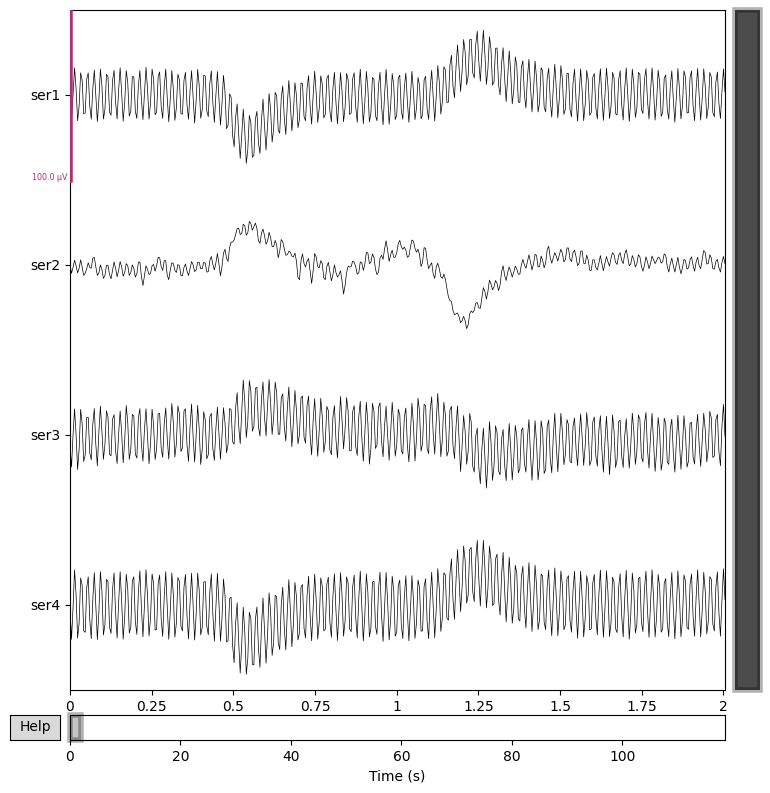

In [59]:
eeg_channel = mne.pick_types(raw_lb.info, eeg=True) 
raw_lb.plot(duration=2, order=eeg_channel, remove_dc=True, scalings=dict(eeg=50e-6)) 


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 9.526 (s)


d:\FHNW_Medical_Informatics\Python\Python_Learn\EEG\.venv\lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


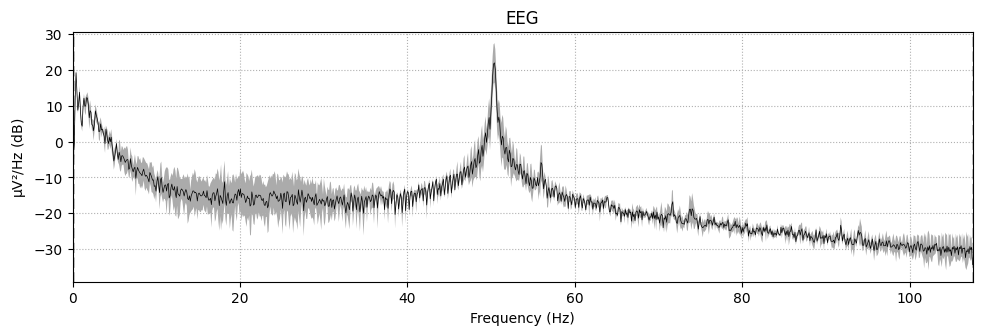

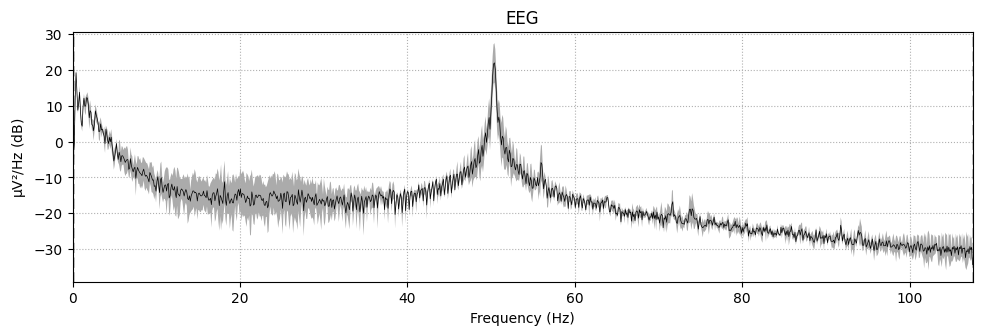

In [60]:
# PSD (power spectral density) provides information about the distribution of power across different frequencies in the EEG signal.
raw_lb.plot_psd(tmin=0, tmax=50, fmin=0, fmax=107.5, average=True) 

Effective window size : 9.526 (s)


d:\FHNW_Medical_Informatics\Python\Python_Learn\EEG\.venv\lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
C:\Users\charl\AppData\Local\Temp\ipykernel_48904\103131514.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  raw_lb.compute_psd().plot(average=True, picks="data", exclude="bads").show()


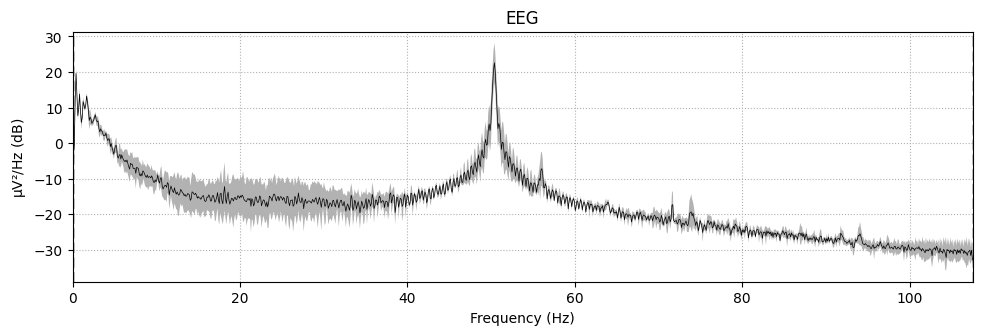

In [61]:
raw_lb.compute_psd().plot(average=True, picks="data", exclude="bads").show()

**1. Data download and preprocessing**

1.7 Filtering EEG data
 
Before commence the filter process, the preprocessed raw data is converted to a DataFrame.

Filtering is the process of removing unwanted frequencies such as noise and artifacts from a signal and preserve the desired frequencies to extract relevant information. 

The filters used during preprocessing are third-order:
* median filter
* low pass filter
* high pass filter
* notch filter

Firstly, a segment of the data is defined, followed by the application of third-order median filter to remove the background noise. Subsequent processing involved additional filtering steps using both low-pass and high-pass filters. The Butterworth filter with a fifth-order design is employed, configuring cutoff frequencies at 0.5 Hertz for the low-pass filter and 50 Hertz for the high-pass filter. The Butterworth filter is known for maintaining a flat frequency response in the passband. To address power interference at 50 Hertz, a notch filter was then applied.

In the final step, a finite impulse response (FIR) filter was designed using the "signal.firwin" function from the SciPy library. FIR filter is widely used for signal processing tasks such as EEG signal processing. This digital filter was configured with 430 taps (coefficients). The cutoff frequencies for this FIR filter were set in the range of 0.01 to 0.06. The lower cutoff frequency of 0.01 Hz is chosen to preserve very low-frequency components in the EEG signal. This includes elements like baseline shifts or gradual trends, which can be important features. The upper cutoff frequency of 0.06 Hz indicates that the filter permits relatively higher-frequency components within the low-frequency range to pass. This selective allowance is designed to capture specific frequency components while mitigating both lower-frequency drifts and potential higher-frequency noise. Essentially, FIR filter is used to isolate targeted frequency components within the EEG signal, striking a balance between retaining essential low-frequency information and minimizing unwanted noise. The chosen cutoff frequencies and the overall design aim to enhance the quality and interpretability of the EEG data for subsequent analyses.

***Source***

- https://neuraldatascience.io/7-eeg/erp_filtering.html

***Source code***

- https://www.kaggle.com/code/sam1o1/eeg-signal-processing
- https://www.daanmichiels.com/blog/2017/10/filtering-eeg-signals-using-scipy/



In [62]:
# Get pandas dataframe from raw format
data_lb = raw_lb.to_data_frame()
data_lb = data_lb.drop("time", axis=1) #drop "time" column

# Get pandas series to use in data preprocessing
ser1 = data_lb["ser1"]
ser2 = data_lb["ser2"]
ser3 = data_lb["ser3"]
ser4 = data_lb["ser4"]

print(type(ser1))
data_lb

<class 'pandas.core.series.Series'>


ser1       ser2       ser3       ser4
0      58.490141  62.484472  48.958110  58.887317
1      46.140845  57.018634  36.240602  40.556341
2      60.338028  60.496894  55.145005  59.151344
3      76.157746  64.720497  70.440387  81.367280
4      64.033803  61.490683  55.230934  66.808109
...          ...        ...        ...        ...
25495  56.101408  56.521739  51.879699  56.511080
25496  47.087324  57.515528  45.520945  44.403583
25497  61.735211  62.236025  58.324382  61.640736
25498  74.084507  64.223602  67.346939  77.746346
25499  61.509859  58.757764  54.973147  64.016973

[25500 rows x 4 columns]

In [63]:
# Define the slice to display in the following code. Just change the value of 'SLICE_FROM' with 0 or a multiple of 510
SLICE_FROM = 510
SLICE_TO = SLICE_FROM + 510

# Create the median filter function
def median(data: pd.Series | np.ndarray) -> np.ndarray:# pass either one, input: numpy array 1D (one column)
    #applying the median filter
    med_filtered= signal.medfilt(data, kernel_size=3) # applying the median filter order 3 (kernel_size=3)
    return med_filtered # return the med-filtered signal: numpy array 1D

# Create a butterworth bandpass filter function
def butter_bandpass(lowcut, highcut, fs, order=5) -> tuple:
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data: pd.Series, lowcut: float, highcut: float, fs: float, order=5) -> np.ndarray:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

# Create notch filter function at 50Hz
def notch_filter(time, band, freq, ripple, order, filter_type, data) -> np.ndarray:

    fs   = 1/time
    nyq  = fs/2.0
    low  = freq - band/2.0
    high = freq + band/2.0
    low  = low/nyq
    high = high/nyq
    b, a = signal.iirfilter(
            order, 
            [low, high], 
            rp=ripple, 
            btype='bandstop',
            analog=False, 
            ftype=filter_type
        )
    
    a = signal.lfilter(b, a, data)
    return a

In [64]:
# Create a preprocessing function

def preprocessing(data: pd.DataFrame, slice_from: int, slice_to: int) -> pd.DataFrame:
    # Define butter bandpass filter parameters
    lowcut = 0.5
    highcut = 40
    fs = 215
    order = 4
    
    # Define notch filter parameters
    time = 1/215
    band = 4
    freq = 50
    ripple = 1
    order = 2
    filter_type = 'butter'

    # Create an empty pandas DataFrame
    cleaned_data = pd.DataFrame()

    # Loop through all columns and apply the filters
    for key, value in data.items():

        # for each column plot all the filters results
        fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(15,25)) # 4 rows, 1 column

        # apply median filter
        series_mf = median(value)

        # apply butter bandpass filter
        series_bbf = butter_bandpass_filter(series_mf, lowcut, highcut, fs, order)

        # apply notch filter
        series_nf = notch_filter(time, band, freq, ripple, order, filter_type, series_bbf)

        # add the processed data to the dataframe
        cleaned_data[key] = series_nf

        # plot each steps ax0 raw value, ax1 after butter bandpass, ax2 after median, ax3 after notch filter.
        ax0.plot(value[slice_from:slice_to])
        ax0.set_title('Raw data')
        ax0.set_xlabel('Data Point')
        ax0.set_ylabel('Amplitude (\u03BCV)')

        ax1.plot(series_mf[slice_from:slice_to], color="orange")
        ax1.set_title('After median filter')
        ax1.set_xlabel('Data Point')
        ax1.set_ylabel('Amplitude (\u03BCV)')

        ax2.plot(series_bbf[slice_from:slice_to], color="red")
        ax2.set_title('+ butter bandpass filter')
        ax2.set_xlabel('Data Point')
        ax2.set_ylabel('Amplitude (\u03BCV)')


        ax3.plot(series_nf[slice_from:slice_to], color="green")
        ax3.set_title('+ notch filter')
        ax3.set_xlabel('Data Point')
        ax3.set_ylabel('Amplitude (\u03BCV)')

        
        fig.suptitle(f"Filters apply to '{key}'")

    return cleaned_data

            ser1       ser2       ser3       ser4
0       7.681072   9.491899   6.032978   6.751419
1      28.549825  33.319081  22.926410  26.338979
2      49.560767  54.099221  41.447948  47.628816
3      60.726091  62.369908  52.704267  60.160793
4      63.929381  62.665218  56.046259  65.219784
...          ...        ...        ...        ...
25495  -0.296273  -8.718308   4.212854  -1.313726
25496  -0.105815  -7.483555   3.479435  -0.689297
25497   1.640987  -4.783757   3.418332   1.957232
25498   0.575097  -3.280914   2.204631   0.974806
25499  -2.381204  -3.996623   0.095607  -2.072305

[25500 rows x 4 columns]


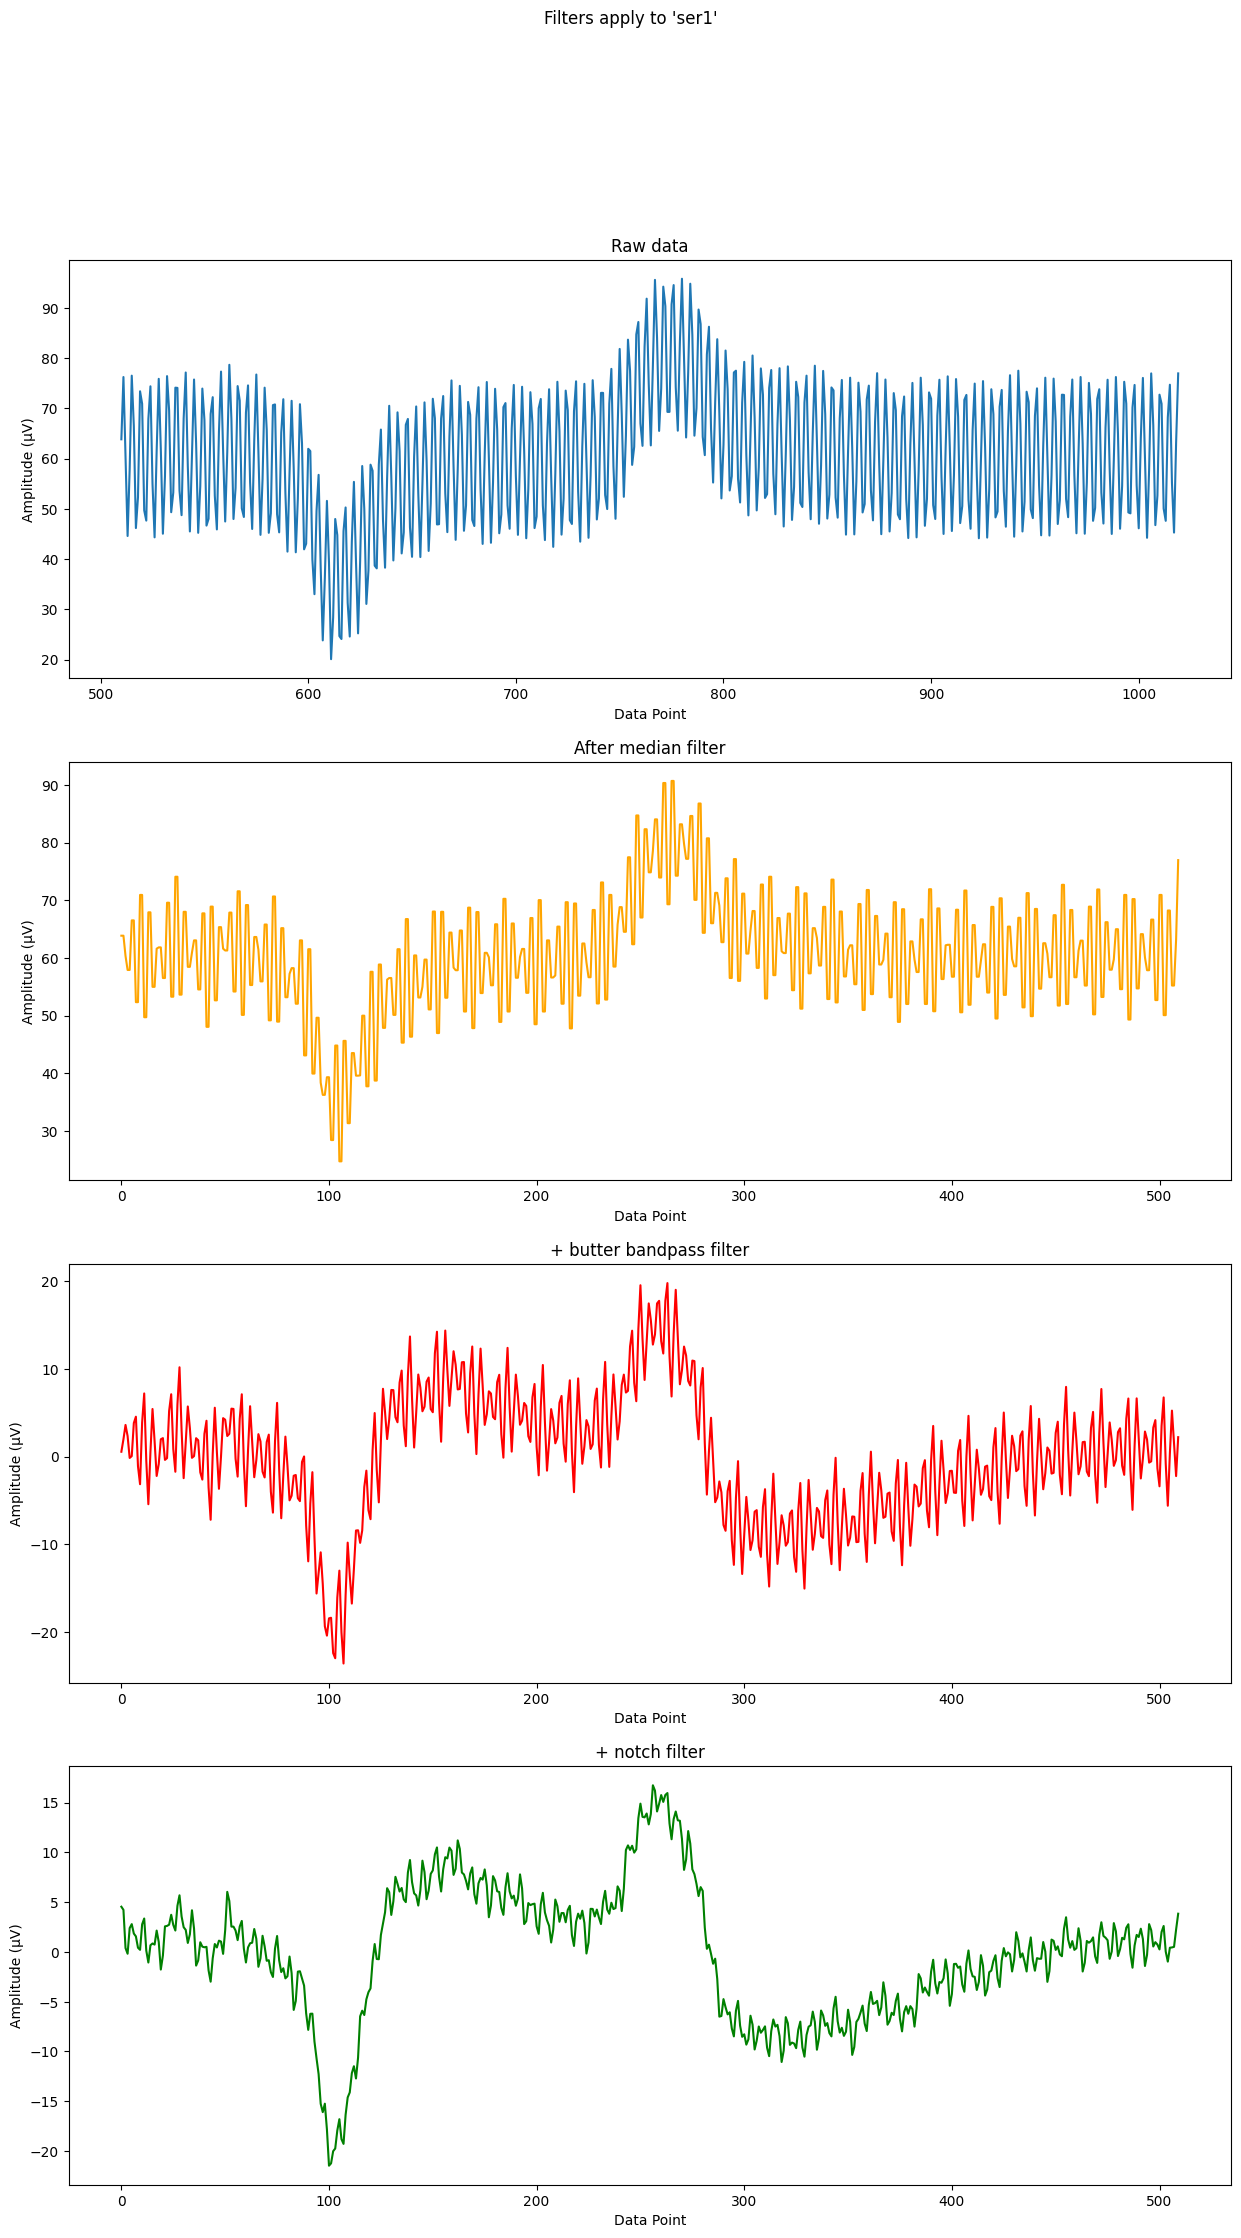

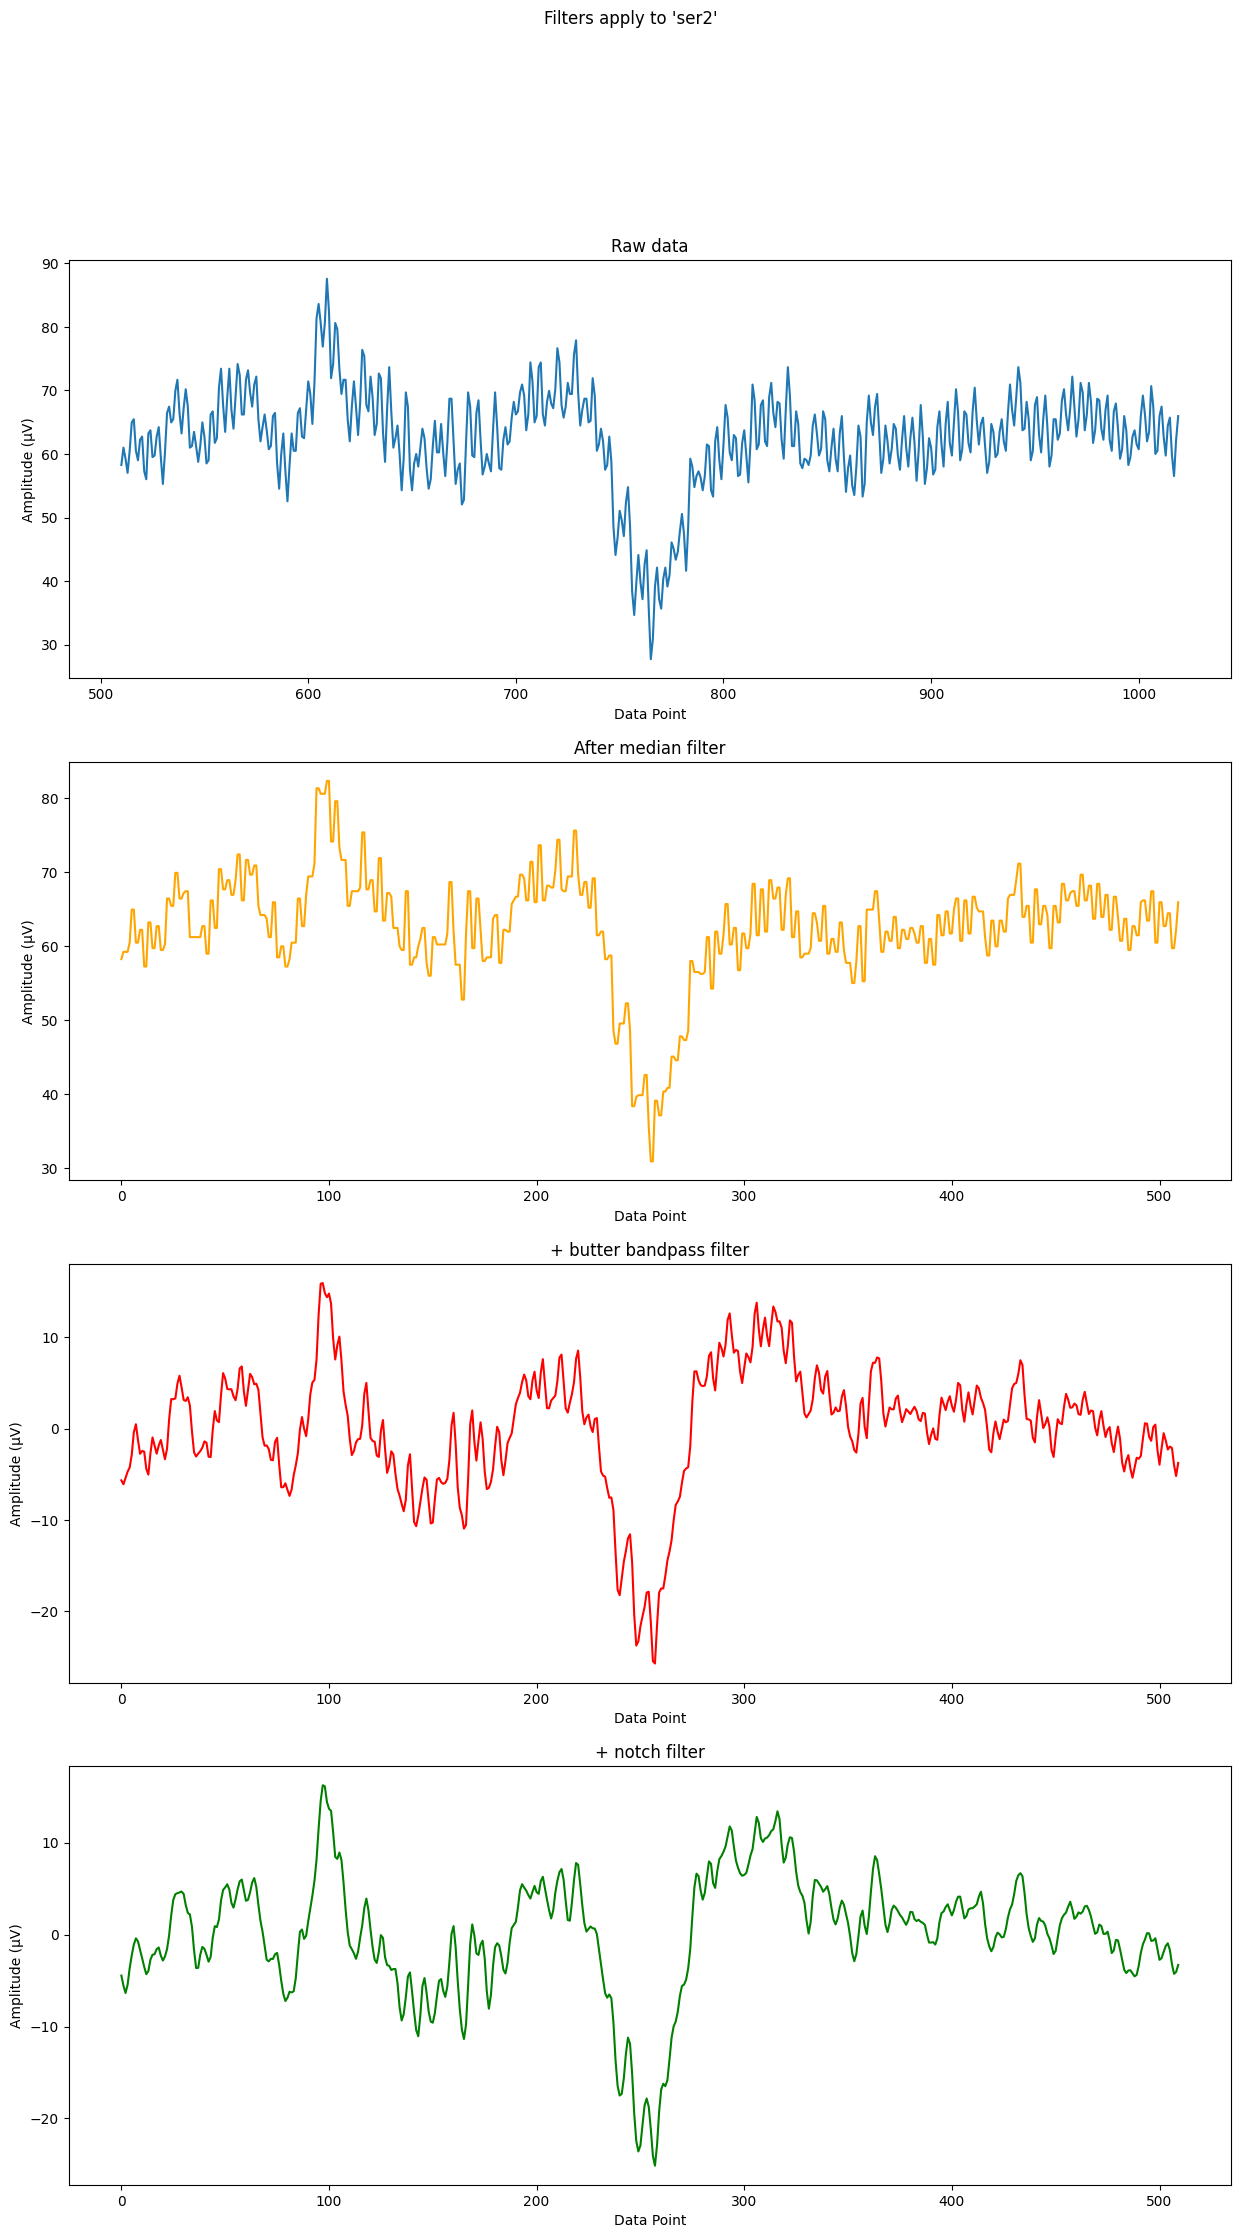

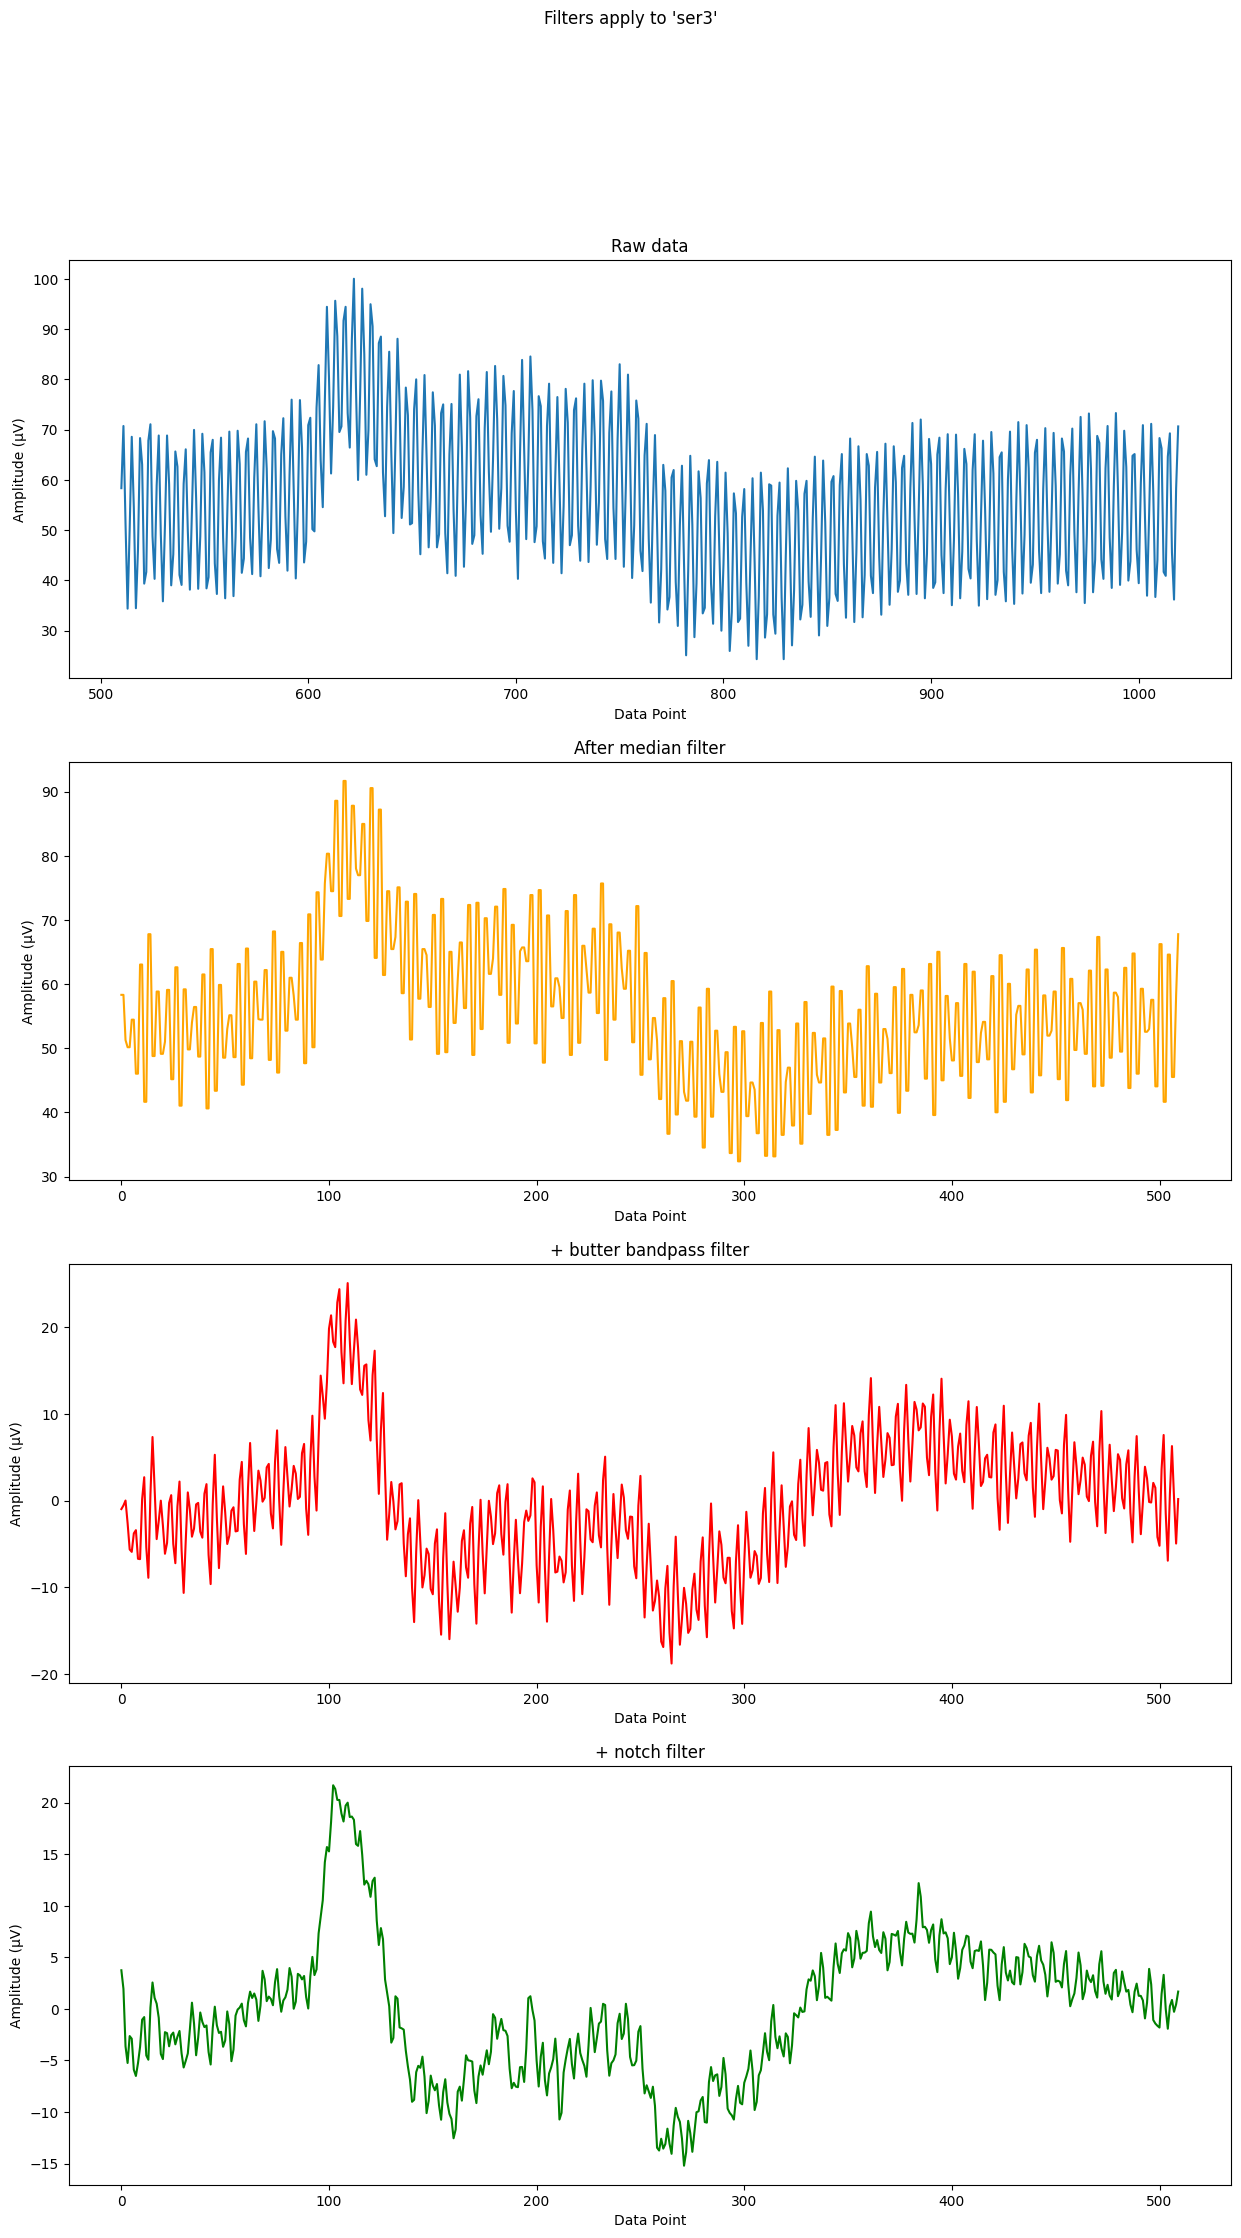

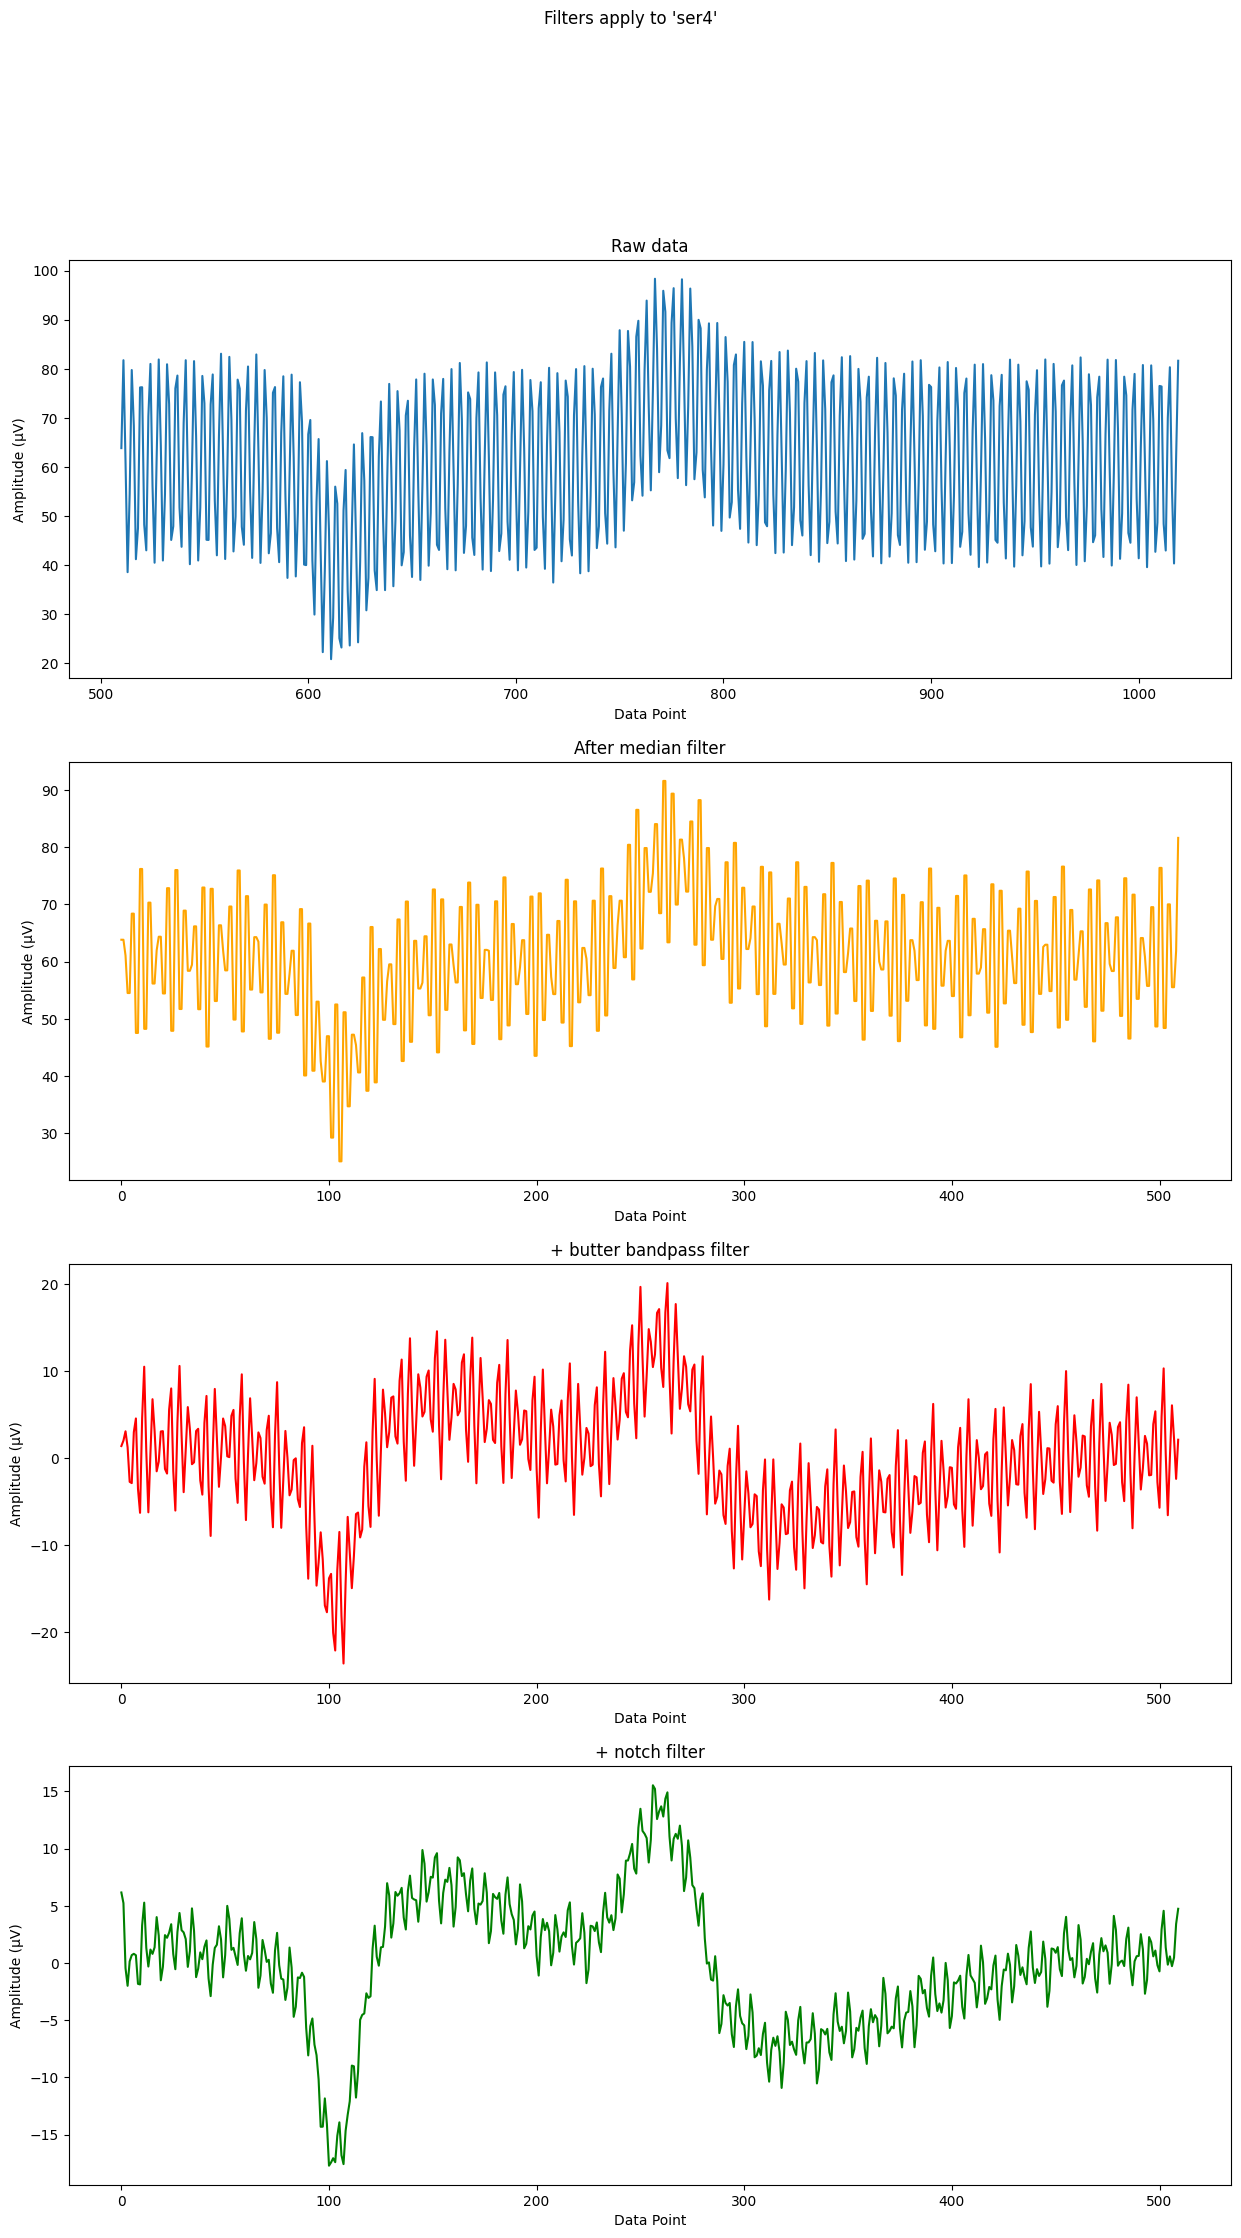

In [65]:
lb_cleaned = preprocessing(data_lb, SLICE_FROM, SLICE_TO)
print(lb_cleaned)


In [66]:
# Create a FIR filter function
cutoff_freq = [0.01, 0.06] #Hz
filter = signal.firwin(430, [0.01, 0.06], pass_zero=False)

# Visualize the filter
# plt.figure(figsize=(12, 6))
# plt.plot(filter)
# plt.title("Filtered EEG Data")
# plt.xlabel("Time (s)")
# plt.ylabel("Amplitude")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [67]:
# Create a comparison plot function
def plot_compare(
        df_original: np.ndarray | pd.DataFrame, 
        df_cleaned: np.ndarray | pd.DataFrame,
        slice_from: int, 
        slice_to: int, 
        color_original: str="green", 
        color_cleaned: str="orange",
        name: str=""
) -> None: #return nothing because its a plot function
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,5))
    ax1.plot(df_original[slice_from:slice_to], color_original)
    ax2.plot(df_cleaned[slice_from:slice_to], color_cleaned)
    fig.suptitle(f"Signal Before and after FIRWIN function \n {name}")

In [68]:
# Create a function to apply the filter
def processing_fir_filter(df: pd.DataFrame, filter_function: signal.filter_design) -> pd.DataFrame:
    filtered_data = pd.DataFrame()
    for key, value in df.items():
        processed_data = signal.convolve(value, filter_function, mode='same')

        # plot results
        plot_compare(df[key], processed_data, SLICE_FROM, SLICE_TO, name=f"{key}")
        # add the processed data to the dataframe
        filtered_data[key] = processed_data

    return filtered_data

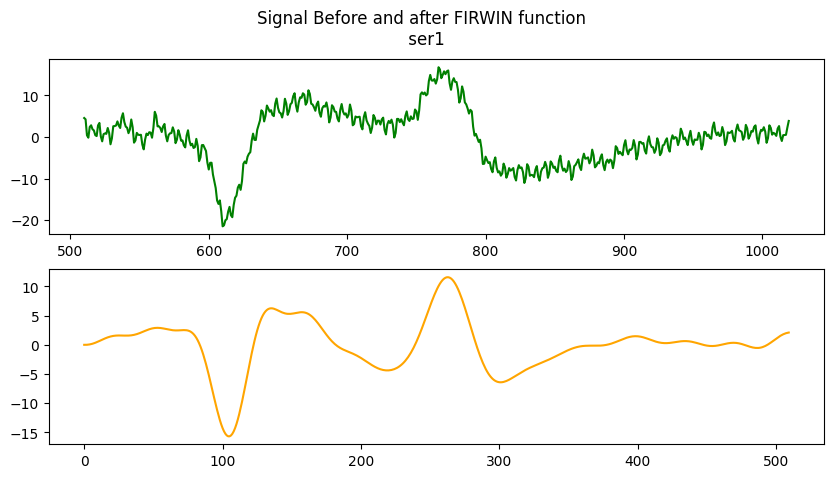

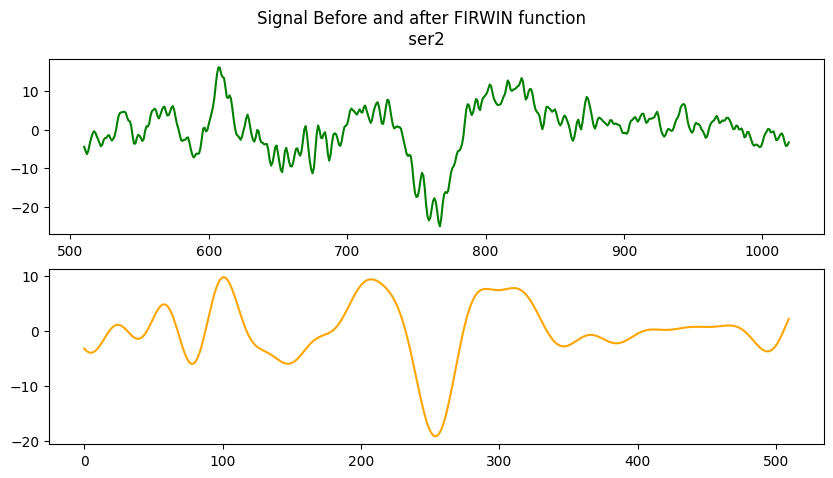

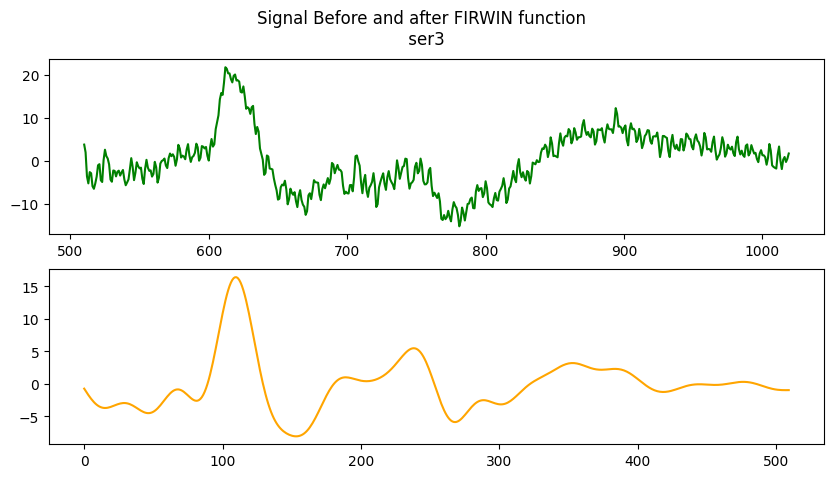

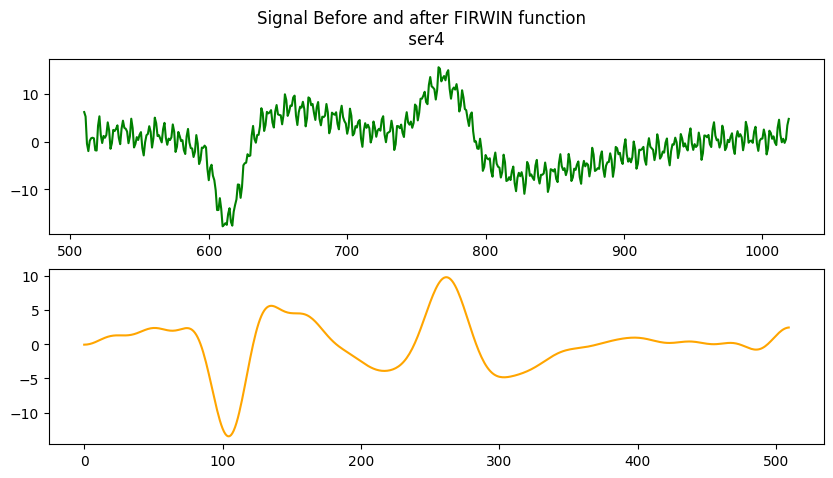

In [69]:
# Apply signal.firwin function : FIR (finite impulse response) filter to process the signal in series 1 and compare the results
lb_filtered = processing_fir_filter(lb_cleaned, filter)

**1. Data download and preprocessing**

1.8 Repeat the same preprocessing and filtering steps on short blink data
Compare long blink data with short blink...

Text(0.5, 1.0, 'The first 510 points of Short Blink')

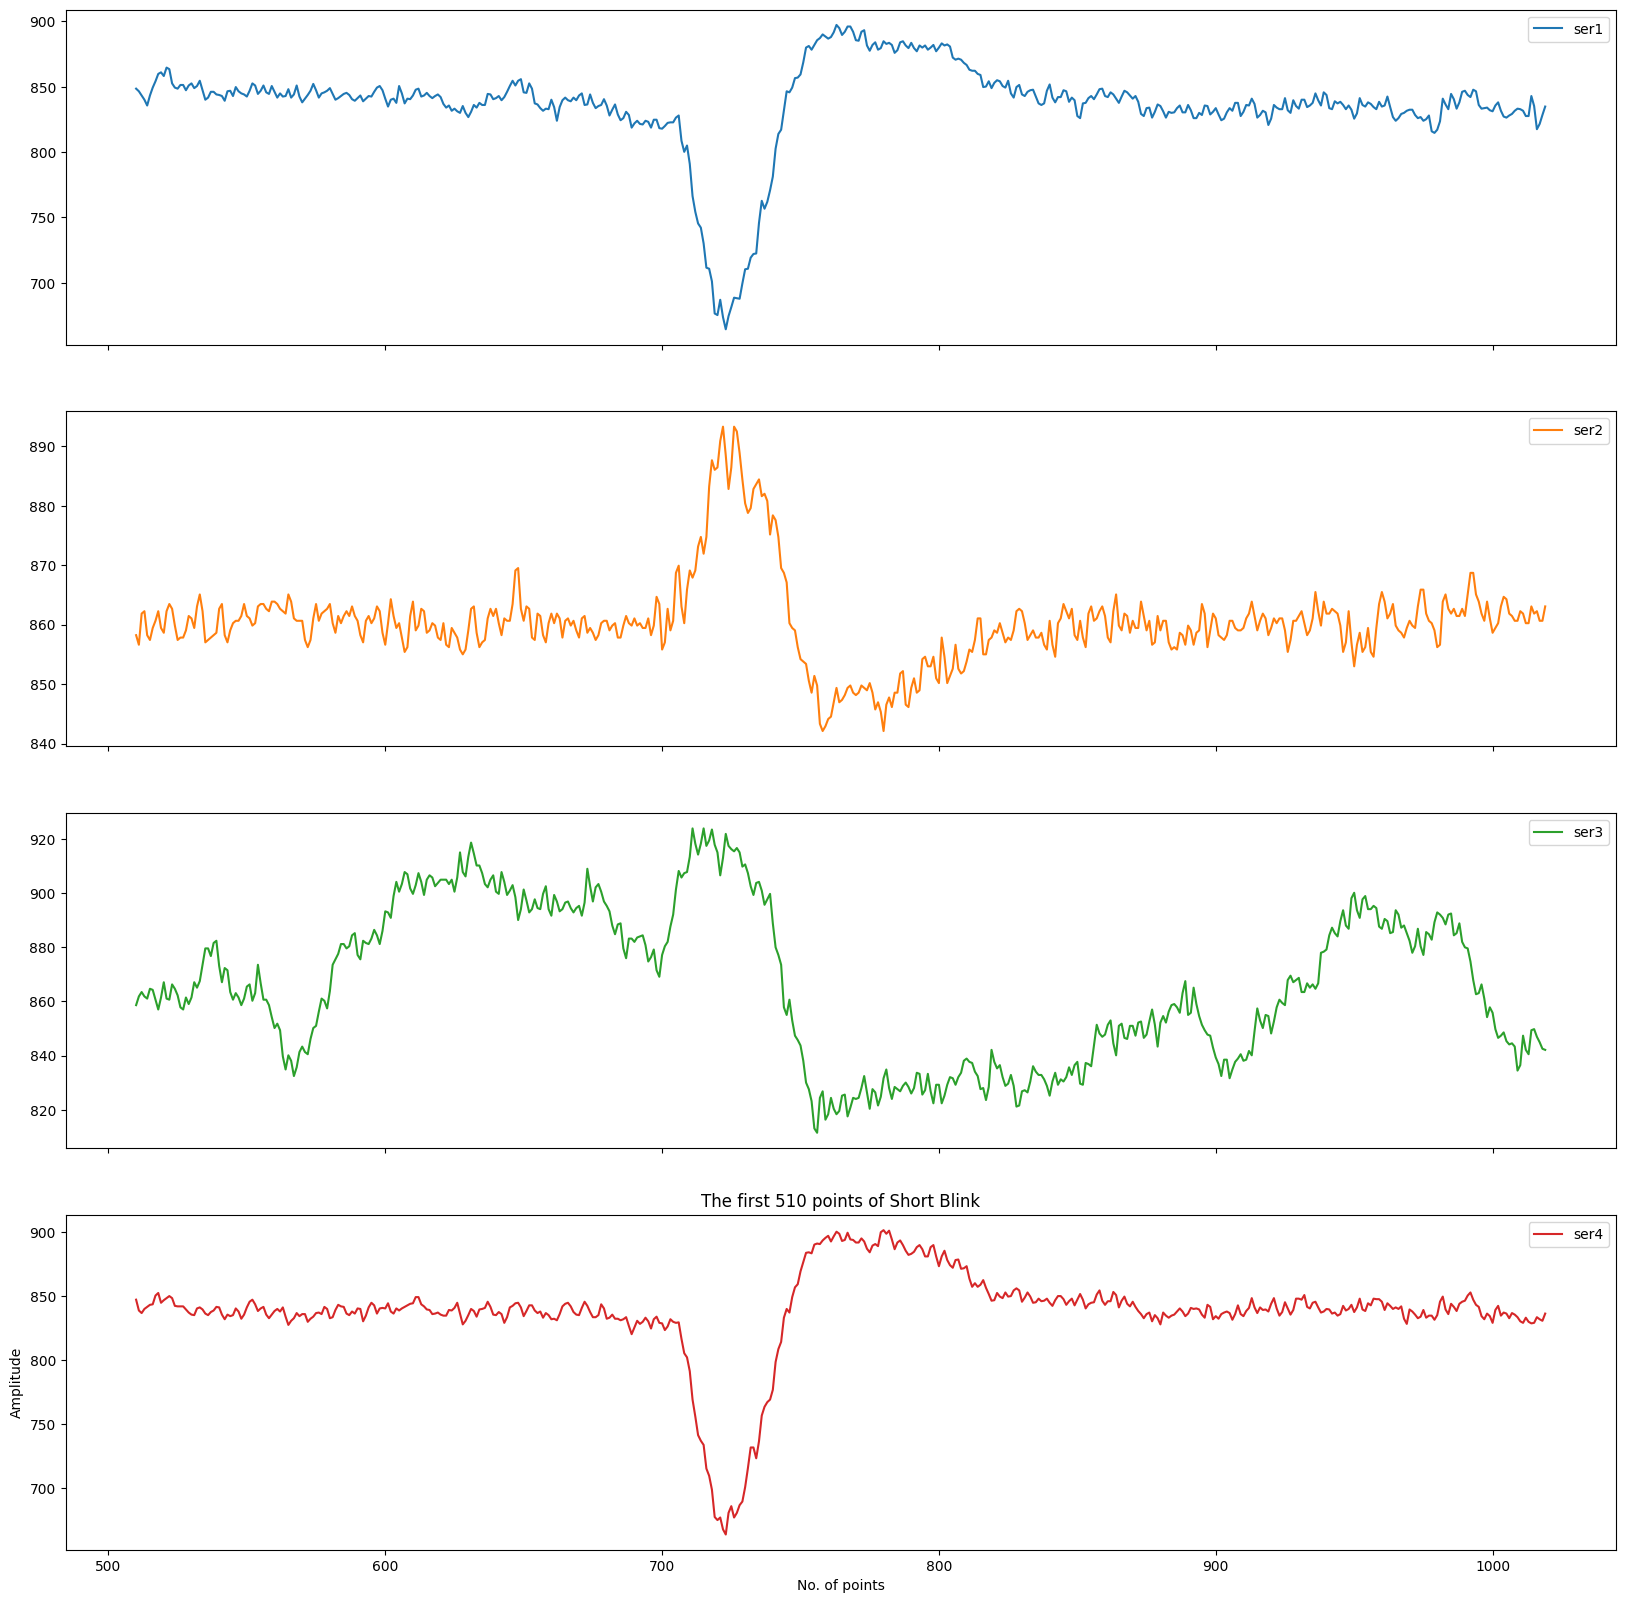

In [70]:
# Short blink data
df2 = pd.read_csv('data\\ShortBlink.csv', sep = ",")
df2[['Col1', 'Col2', 'Col3', 'Col4']] = df2['data'].str.split(',', expand=True)
# Remove the original 'HeaderColumn' column
df2.drop(columns=['data'], inplace=True)
df2.head(5)
ser1 = df2.iloc[:,0].str.strip('[').astype(float) #to remove square brackets and convert to float
ser2 = df2.iloc[:,1].astype(float) #convert to float
ser3 = df2.iloc[:,2].astype(float) #convert to float
ser4 = df2.iloc[:,3].str.strip(']').astype(float) #remove square brackets and convert to float
# ser 1,2,3,4 are numpy arrays, length: 25500, dtype: float64
df2 = pd.concat([ser1, ser2, ser3, ser4], axis=1) #concatenate the columns
df2.columns = ['ser1', 'ser2', 'ser3', 'ser4'] #rename the columns
# Extract the first 510 points of the data as sample and visualize it
df2_sample = df2.iloc[510:1020] 
df2_sample.plot(subplots=True, figsize=(20, 20))
plt.xlabel('No. of points')
plt.ylabel('Amplitude')
plt.title('The first 510 points of Short Blink')
#print(sb_ser1[0])

In [71]:
import mne
from sklearn.preprocessing import MinMaxScaler

n_channels = len(df2.columns) #define number of channels
print(n_channels)
ch_names = list(df2.columns) #list of channel names
print(ch_names)

# Min-max scaling
scaler = MinMaxScaler(feature_range=(0.000020,0.000100))
df2_scaled = scaler.fit_transform(df2.to_numpy()) 
df2_norm = pd.DataFrame(df2_scaled, columns=df2.columns)

values = df2_norm.T # transpose the dataframe
ch_types = ['eeg']*df2.shape[1]
sampling_freq = 215 

info = mne.create_info(ch_names=ch_names, sfreq=sampling_freq, ch_types=ch_types)
raw_sb = mne.io.RawArray(values, info)

raw_sb.save('.\\data\\raw_sb.fif', overwrite=True)
print(values)

4
['ser1', 'ser2', 'ser3', 'ser4']
Creating RawArray with float64 data, n_channels=4, n_times=25500
    Range : 0 ... 25499 =      0.000 ...   118.600 secs
Ready.
Overwriting existing file.
Writing d:\FHNW_Medical_Informatics\Python\Python_Learn\EEG\data\raw_sb.fif
Closing d:\FHNW_Medical_Informatics\Python\Python_Learn\EEG\data\raw_sb.fif
[done]
         0         1         2         3         4         5         6      \
ser1  0.000074  0.000074  0.000072  0.000069  0.000071  0.000073  0.000075   
ser2  0.000045  0.000049  0.000054  0.000051  0.000050  0.000047  0.000048   
ser3  0.000074  0.000074  0.000070  0.000067  0.000069  0.000067  0.000064   
ser4  0.000077  0.000076  0.000075  0.000073  0.000071  0.000073  0.000075   

         7         8         9      ...     25490     25491     25492  \
ser1  0.000076  0.000074  0.000077  ...  0.000081  0.000081  0.000082   
ser2  0.000050  0.000047  0.000048  ...  0.000041  0.000043  0.000042   
ser3  0.000062  0.000065  0.000063  ...  

C:\Users\charl\AppData\Local\Temp\ipykernel_48904\3194721739.py:21: RuntimeWarning: This filename (d:\FHNW_Medical_Informatics\Python\Python_Learn\EEG\data\raw_sb.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_sb.save('.\\data\\raw_sb.fif', overwrite=True)


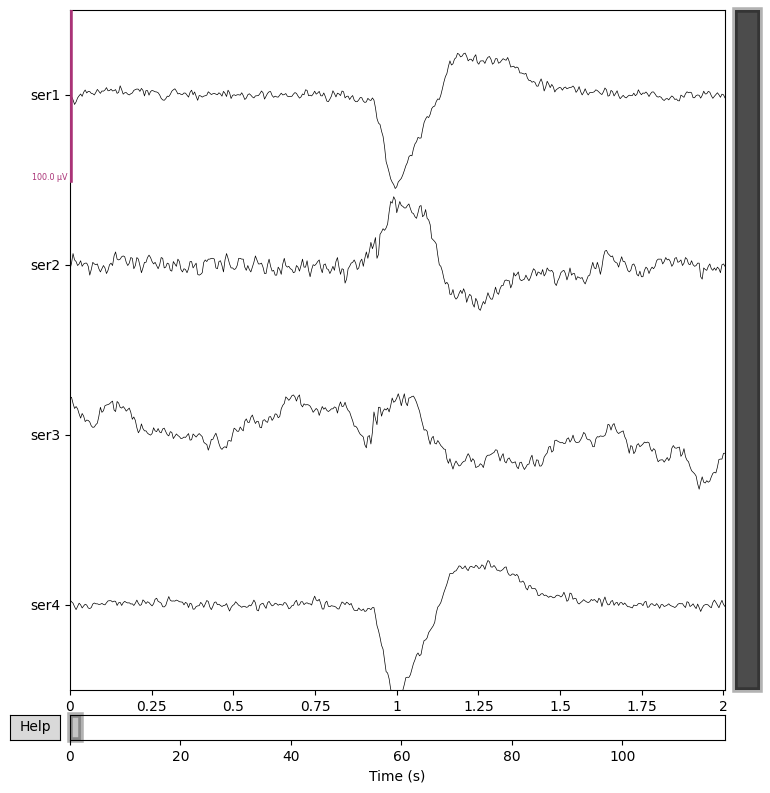

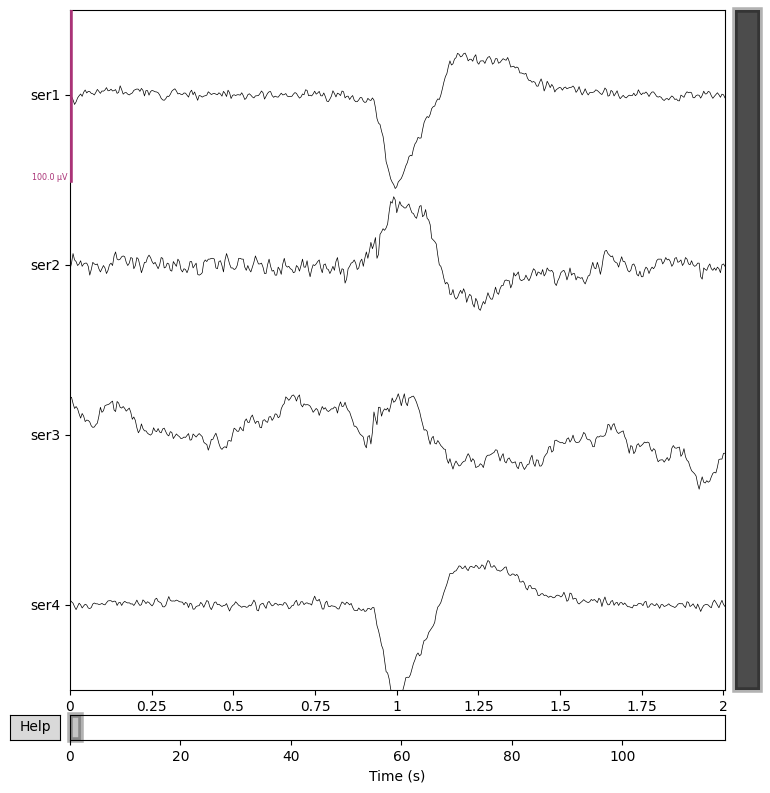

In [72]:
ssp_projectors = raw_sb.info['projs'] 
raw_sb.del_proj() #use to remove SSP projection vector
eeg_channel = mne.pick_types(raw_sb.info, eeg=True) 
raw_sb.plot(duration=2, order=eeg_channel, remove_dc=True, scalings=dict(eeg=50e-6)) 


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 9.526 (s)
Effective window size : 9.526 (s)


d:\FHNW_Medical_Informatics\Python\Python_Learn\EEG\.venv\lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
d:\FHNW_Medical_Informatics\Python\Python_Learn\EEG\.venv\lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
C:\Users\charl\AppData\Local\Temp\ipykernel_48904\2429190449.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  raw_sb.compute_psd().plot(average=True, picks="data", exclude="bads").show()


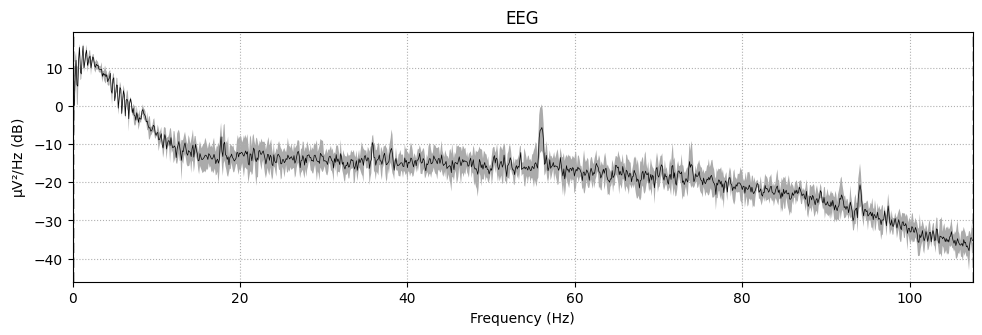

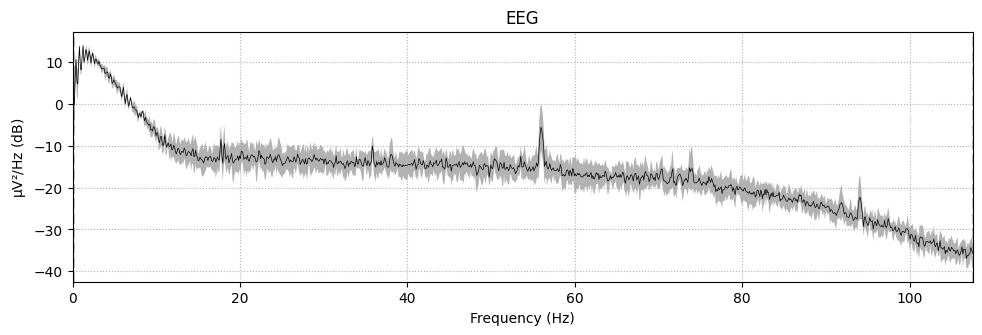

In [73]:
raw_sb.plot_psd(tmin=0, tmax=50, fmin=0, fmax=107.5, average=True) 
raw_sb.compute_psd().plot(average=True, picks="data", exclude="bads").show()

In [74]:
# Get pandas dataframe from raw format
data_sb = raw_sb.to_data_frame()
data_sb = data_sb.drop("time", axis=1) #drop "time" column

# Get pandas series to use in data preprocessing
ser1 = data_sb["ser1"]
ser2 = data_sb["ser2"]
ser3 = data_sb["ser3"]
ser4 = data_sb["ser4"]


print(type(ser1))
data_sb

<class 'pandas.core.series.Series'>


ser1       ser2       ser3       ser4
0      73.994169  44.941176  73.636364  76.829268
1      74.227405  48.705882  74.090909  75.731707
2      72.128280  54.352941  70.454545  74.878049
3      69.446064  50.588235  67.500000  72.804878
4      70.962099  49.647059  68.636364  71.097561
...          ...        ...        ...        ...
25495  82.973761  39.294118  48.181818  80.853659
25496  81.457726  45.882353  43.409091  75.609756
25497  79.241983  45.882353  41.363636  74.024390
25498  80.058309  44.000000  42.954545  77.195122
25499  81.574344  44.941176  42.954545  75.853659

[25500 rows x 4 columns]

            ser1       ser2       ser3       ser4
0      12.317819   7.481363  12.258255  12.607067
1      42.487393  26.431899  42.281941  43.485086
2      67.303154  43.541016  66.757138  69.059373
3      75.333817  51.044385  74.099270  77.562765
4      73.533985  51.564544  71.400914  75.720633
...          ...        ...        ...        ...
25495   2.475433  -1.539060   1.557774   1.645603
25496   2.131697  -1.611922   1.164475   0.619021
25497   1.409376  -0.293050   0.196334  -1.424614
25498   0.261482   1.438902  -0.986836  -3.135031
25499  -0.744026   2.075746  -1.791414  -3.814898

[25500 rows x 4 columns]


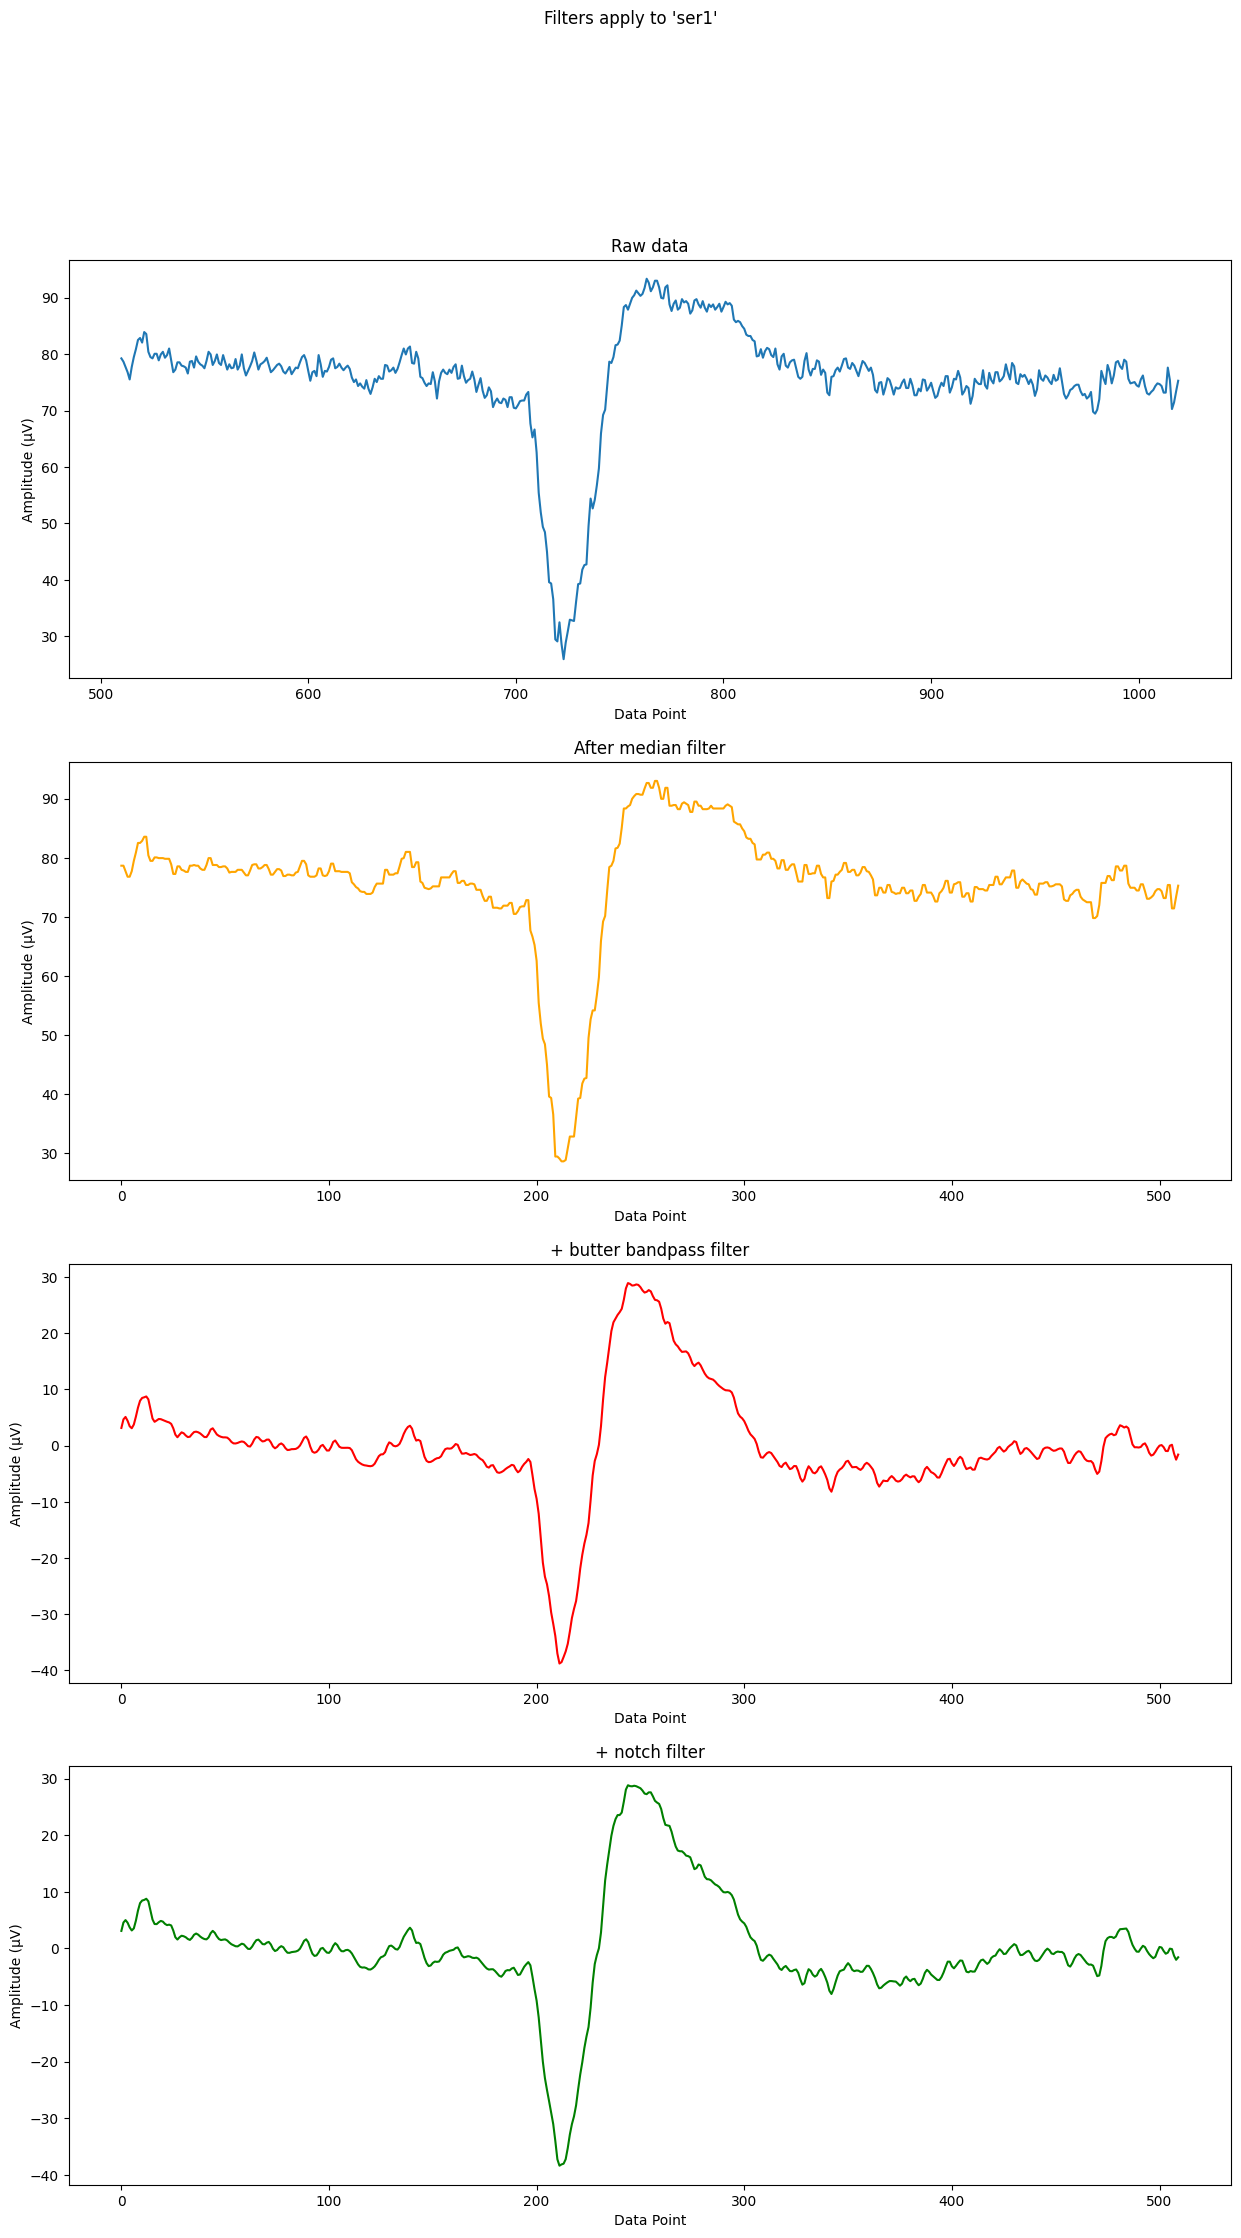

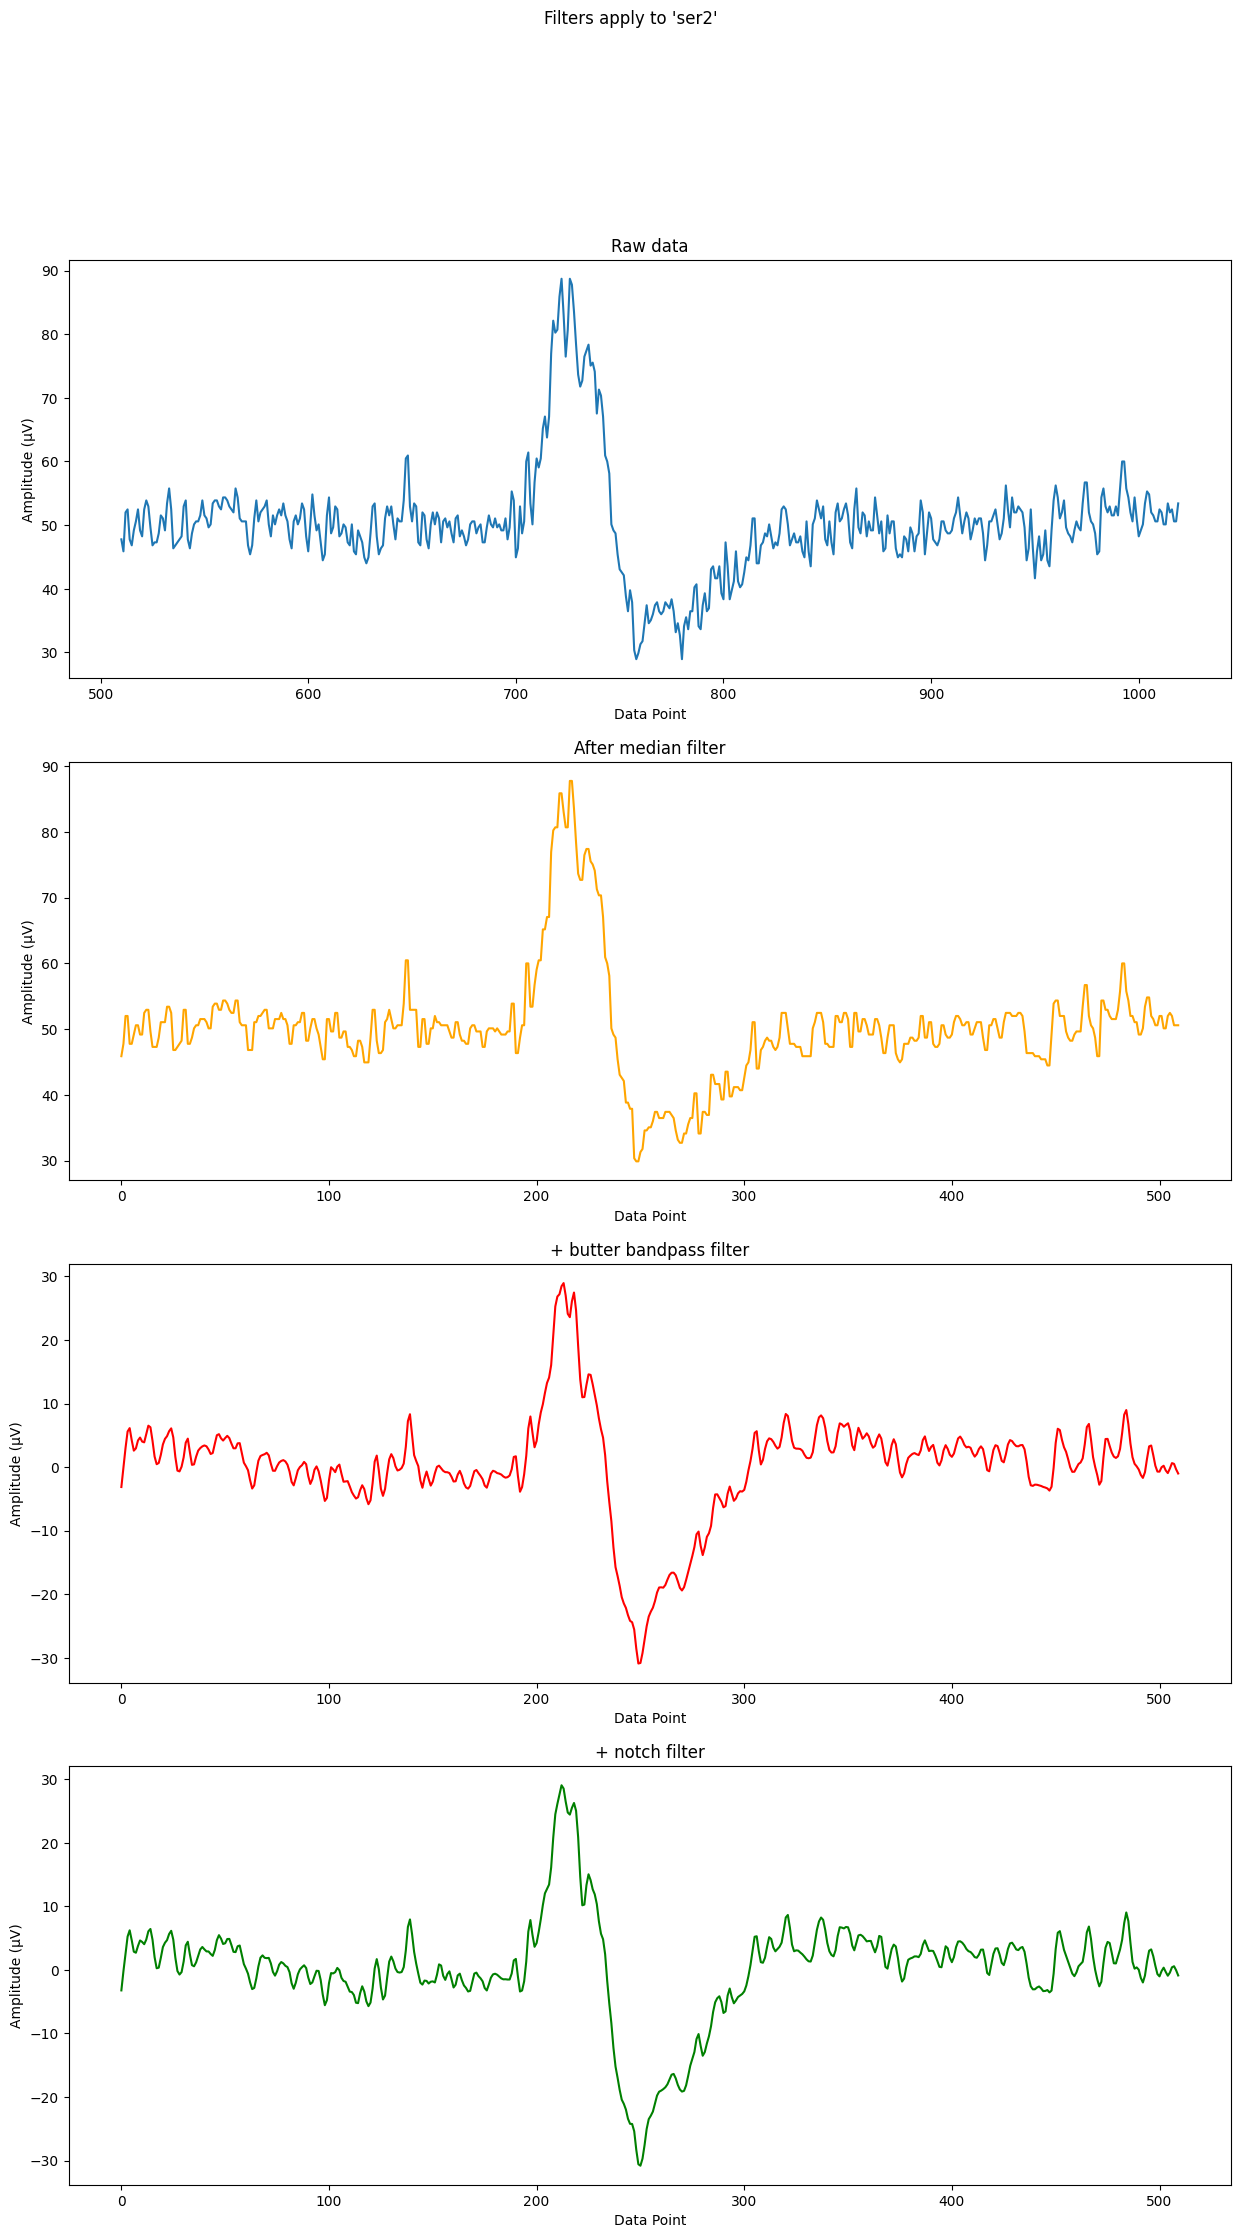

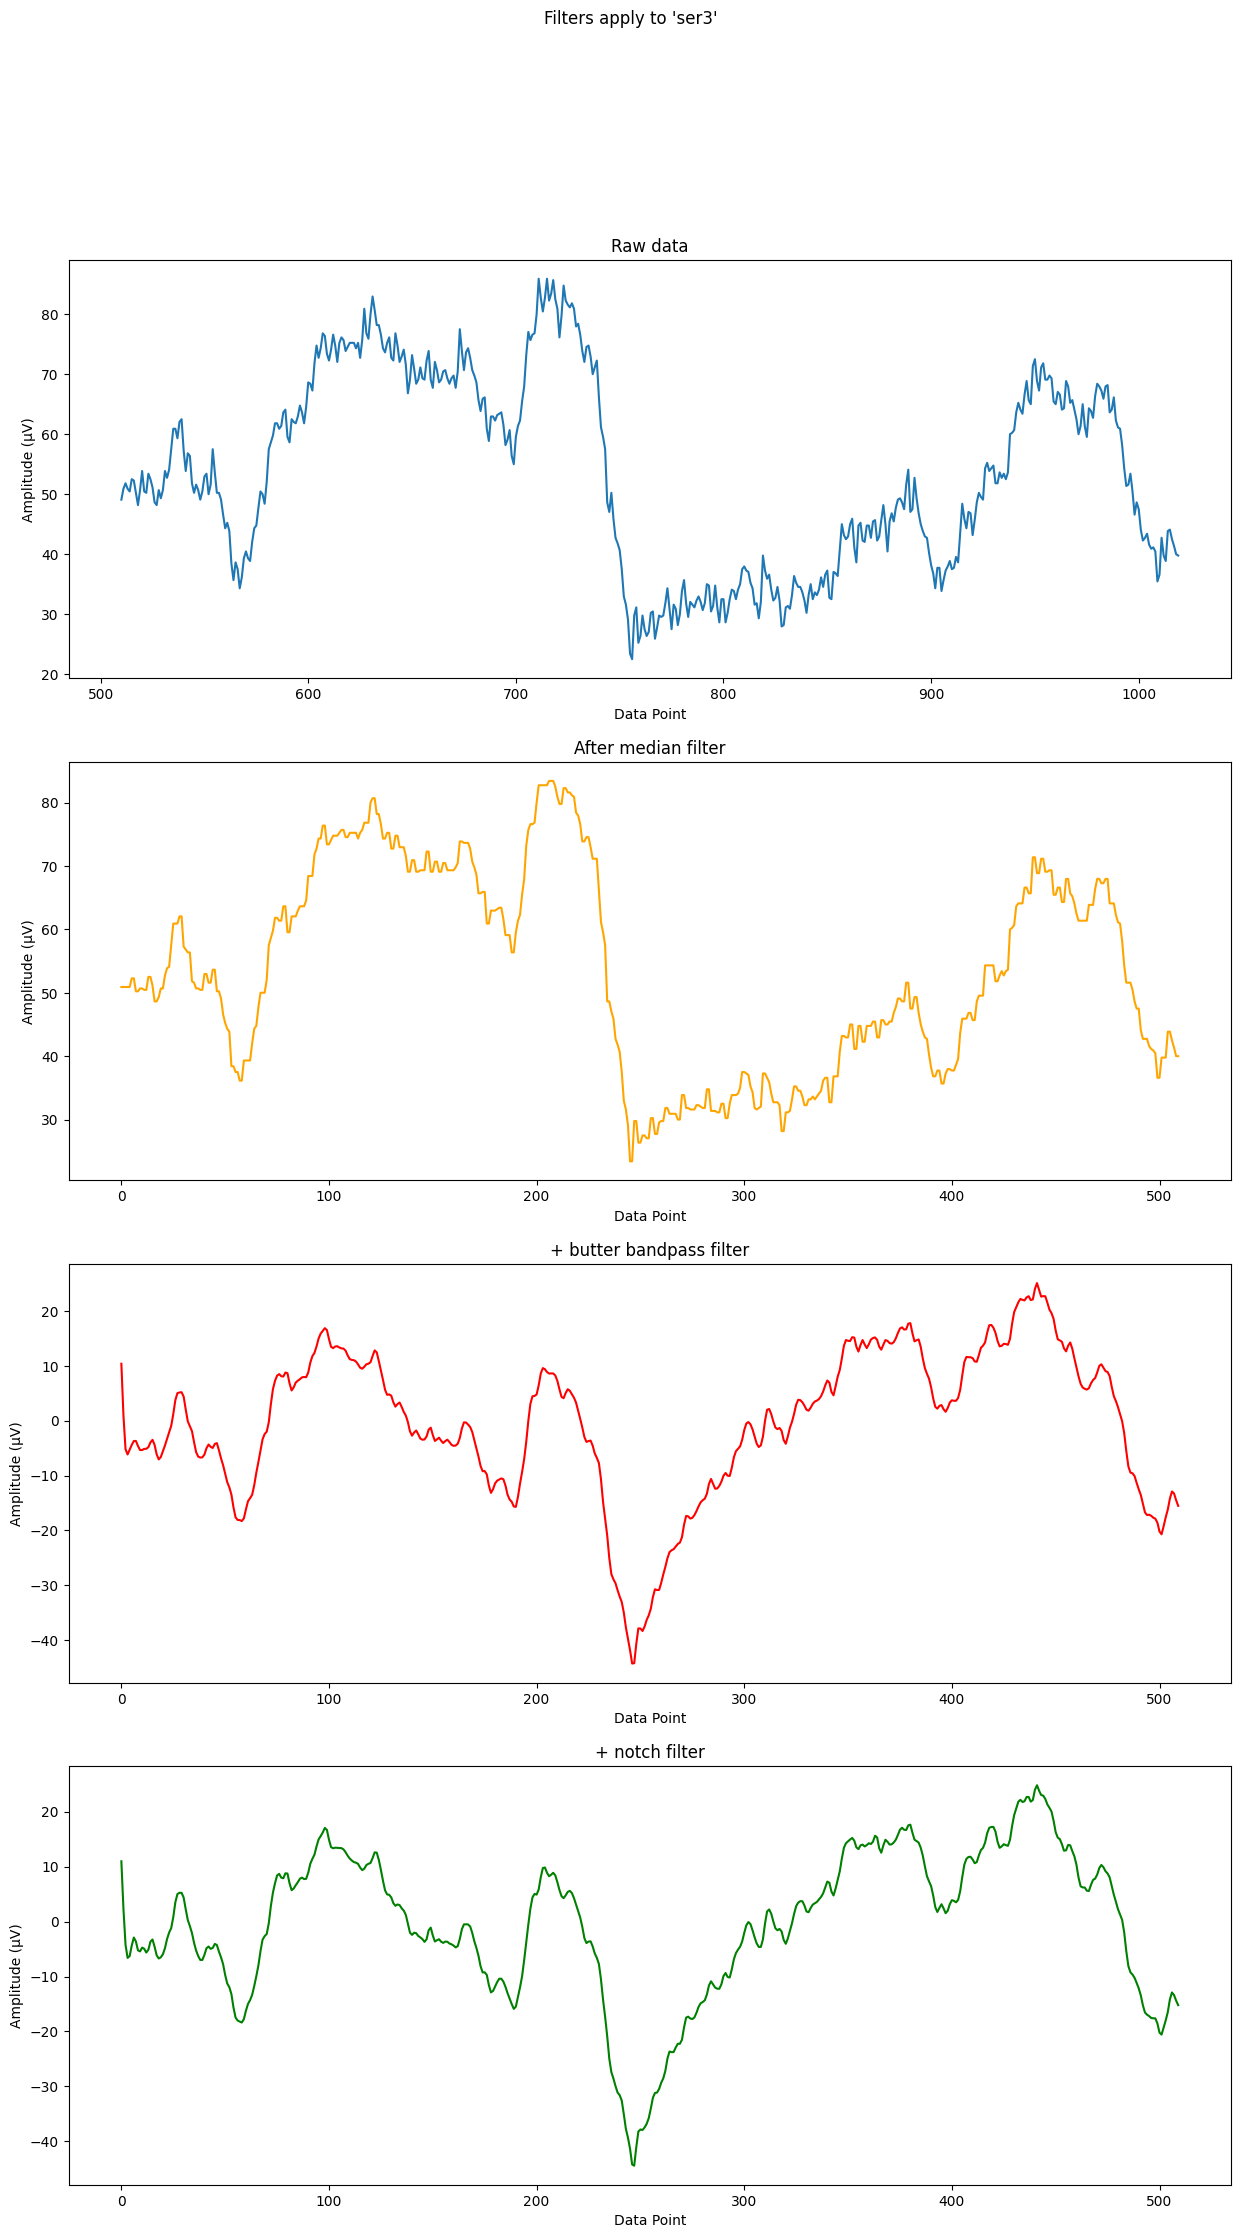

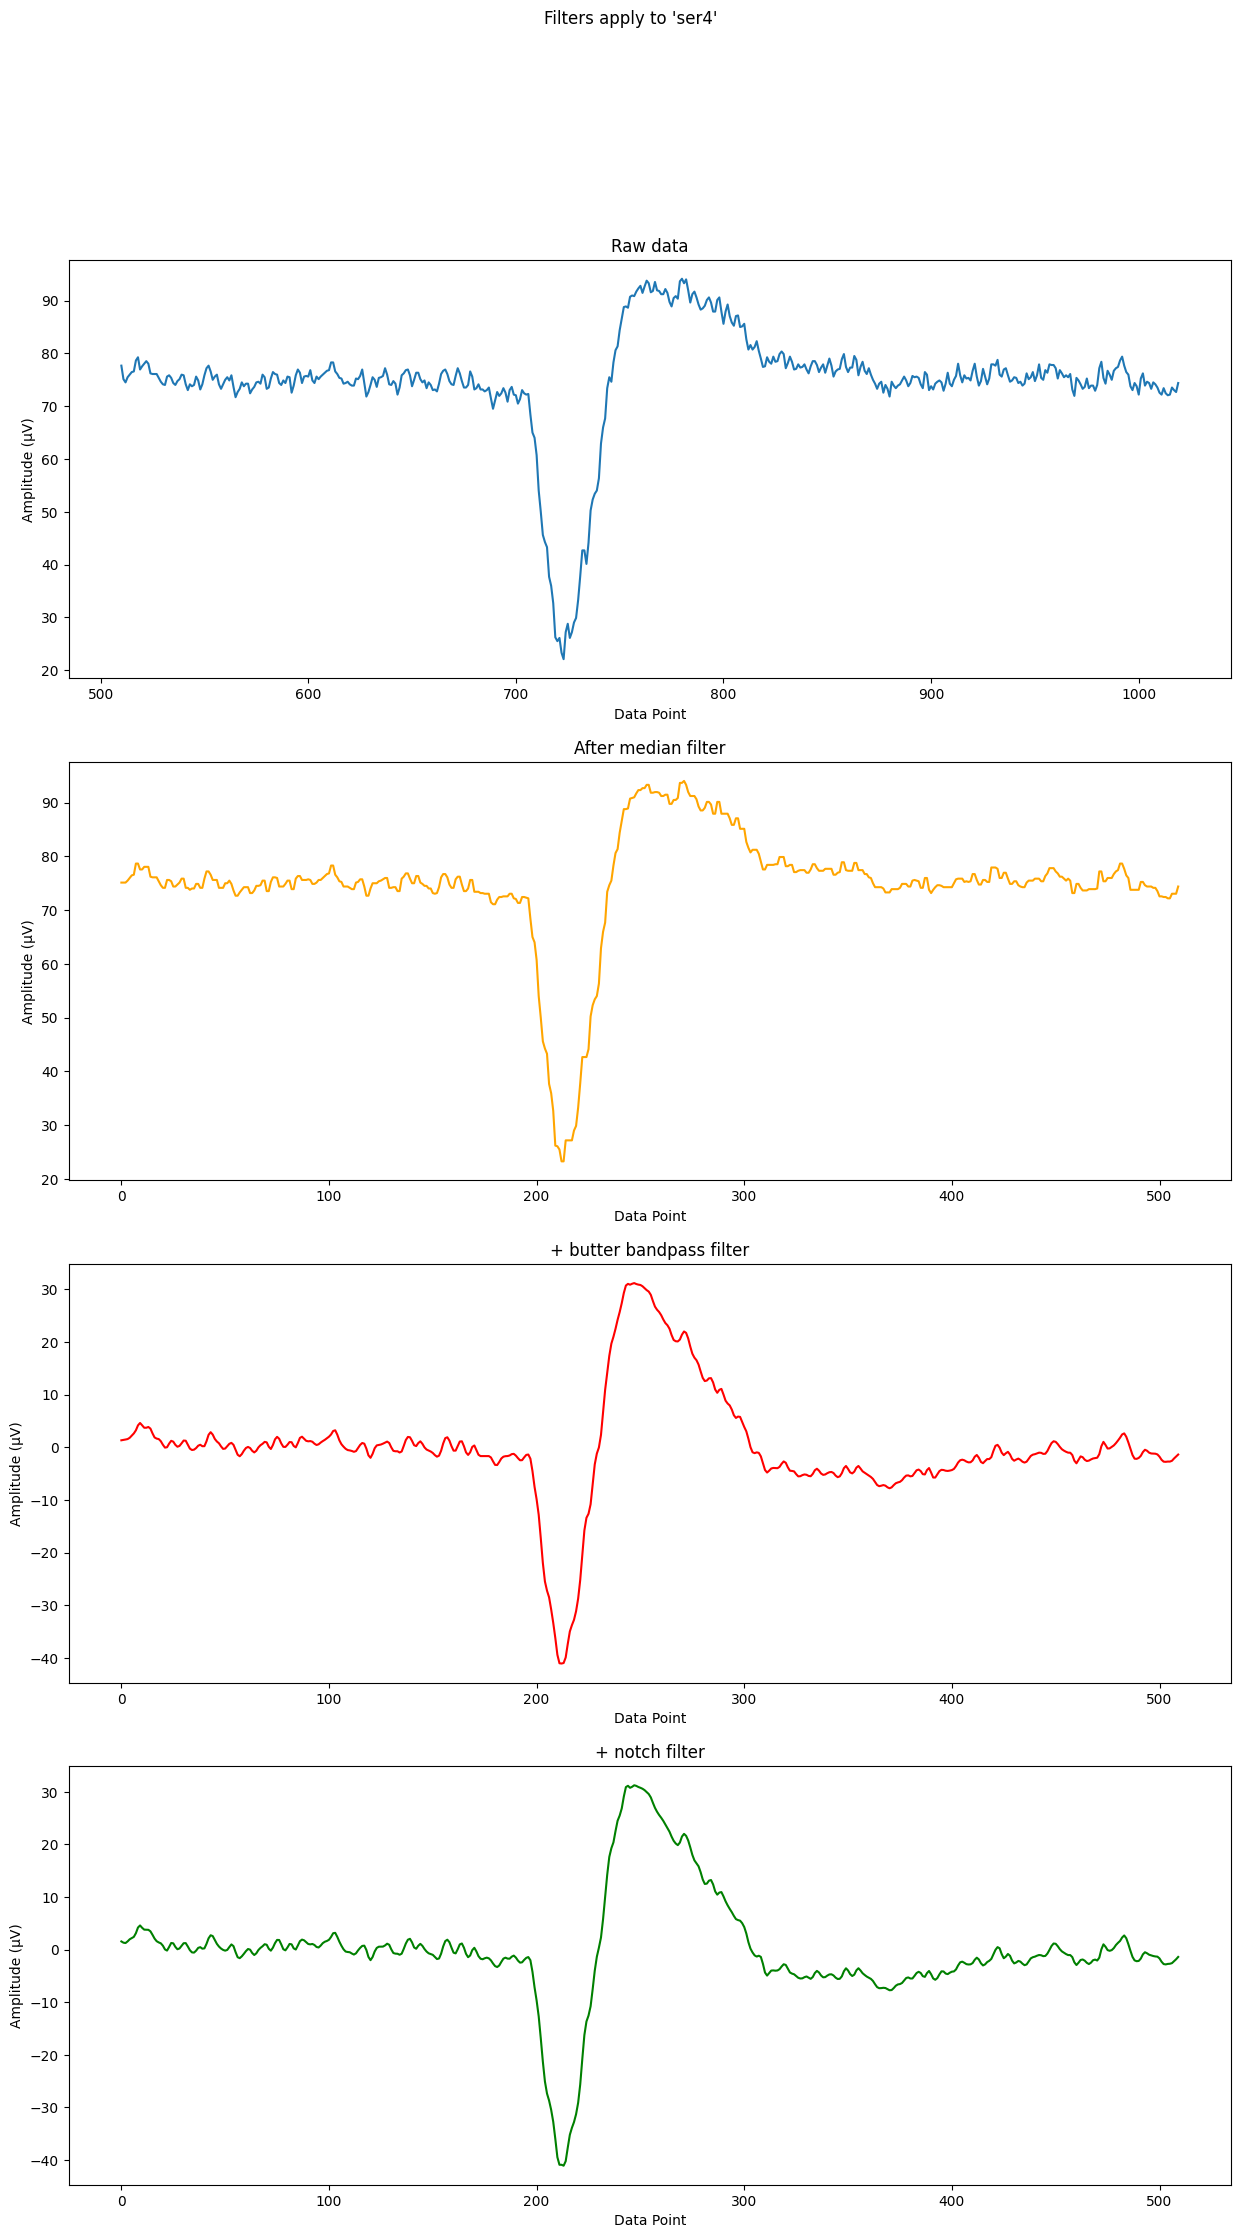

In [75]:
sb_cleaned = preprocessing(data_sb, SLICE_FROM, SLICE_TO)
print(sb_cleaned)


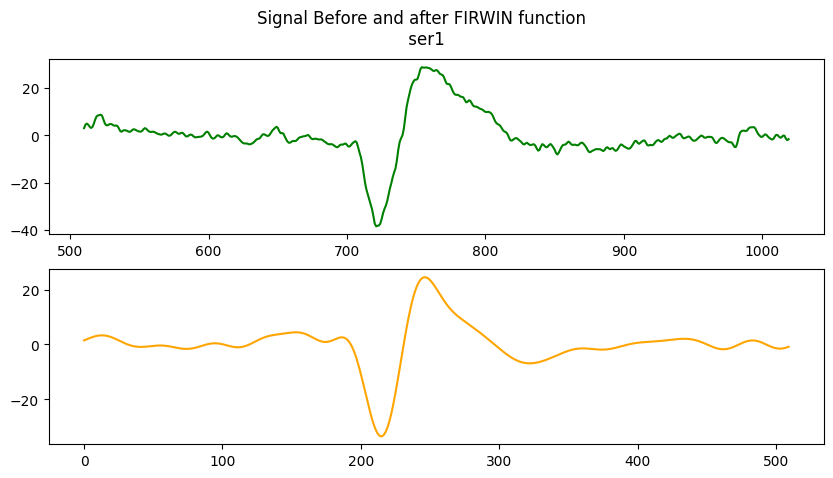

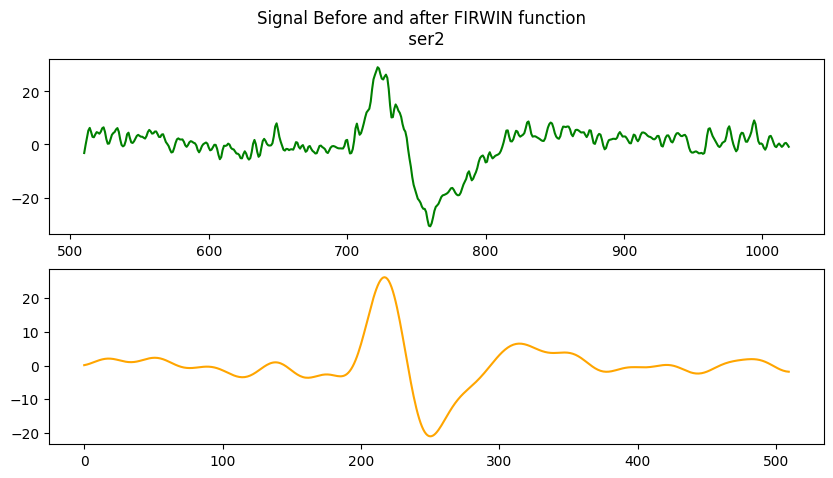

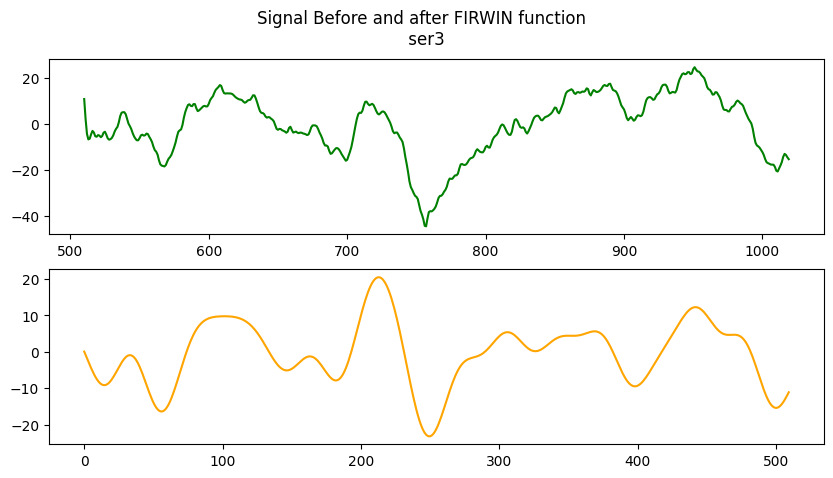

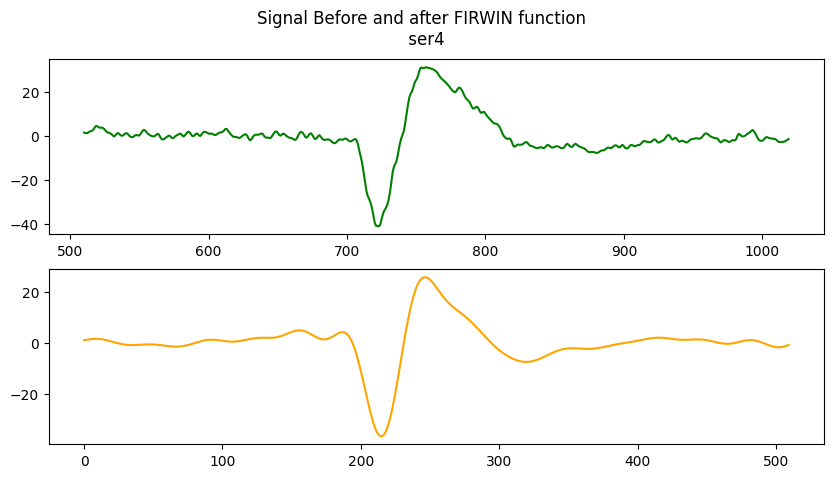

In [76]:
sb_filtered = processing_fir_filter(sb_cleaned, filter)

**1. Data download and preprocessing**

1.9 Binarization

Split the data of 25500 rows into batch by making a list of each blink of 2 seconds with 510 rows, there will be 50 blinks (long or short) split the data into 50 chunks of 510 points each

Create a new column to classify the long blink and short blink filtered dataset into two classes (0 and 1) before concatenating two dataframes together and shuffle it. 

P/S Have to segment the data into batches of 510 points before Windowing`?`

In [77]:
lb_filtered.shape
sb_filtered.shape

(25500, 4)

In [78]:
# Use numpy array split to split the dataframe into 50 chunks of 510 points each
list_long_blink = np.array_split(lb_filtered, lb_filtered.shape[0]/510)
list_short_blink = np.array_split(sb_filtered, sb_filtered.shape[0]/510)
list_short_blink[0], list_long_blink[0]


d:\FHNW_Medical_Informatics\Python\Python_Learn\EEG\.venv\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


(          ser1       ser2       ser3       ser4
 0     9.085347   6.778150  11.301306   9.665317
 1    12.728321   9.028899  14.182483  13.163714
 2    16.320749  11.222769  16.974952  16.597210
 3    19.810653  13.327885  19.641765  19.916636
 4    23.147767  15.314093  22.148634  23.074822
 ..         ...        ...        ...        ...
 505   0.565286  -0.057192   4.175840   0.395468
 506   0.727494  -0.055464   3.433890   0.492176
 507   0.903594  -0.039008   2.646654   0.594973
 508   1.091711  -0.006073   1.818230   0.701780
 509   1.289579   0.044531   0.954325   0.810365
 
 [510 rows x 4 columns],
           ser1       ser2       ser3       ser4
 0     7.191841   8.383751   5.949532   6.888777
 1    10.074215  11.295406   8.535834   9.769685
 2    12.916299  14.152239  11.091077  12.612580
 3    15.677516  16.911520  13.577756  15.376632
 4    18.318712  19.532092  15.959519  18.022433
 ..         ...        ...        ...        ...
 505   0.165091  -1.225225   0.898952   0.

In [104]:
blink_list = []
for i in range(len(list_long_blink)):
    blink_list.append({"data": list_long_blink[i].to_numpy(), "class": 1})

for i in range(len(list_short_blink)):
    blink_list.append({"data": list_short_blink[i].to_numpy(), "class": 0})

df_blink = pd.DataFrame(blink_list)
df_blink.sample(frac = 1)
df_blink["data"][0]

# there are 100 rows of data, each row has 4 columns, each column has 510 points of data

array([[ 7.19184060e+00,  8.38375146e+00,  5.94953162e+00,
         6.88877711e+00],
       [ 1.00742151e+01,  1.12954056e+01,  8.53583376e+00,
         9.76968455e+00],
       [ 1.29162994e+01,  1.41522390e+01,  1.10910765e+01,
         1.26125805e+01],
       ...,
       [ 8.04549274e-02, -2.11472557e+00,  2.70078296e-01,
         6.18735888e-03],
       [ 4.69267885e-02, -2.52345832e+00, -6.03042784e-02,
        -1.99015735e-02],
       [ 2.20221600e-02, -2.89594697e+00, -3.96205908e-01,
        -3.66635458e-02]])

**2. Feature Extraction**

2.1 One of the the recommended techniques for EEG feature extraction selected is Wavelet decomposition 

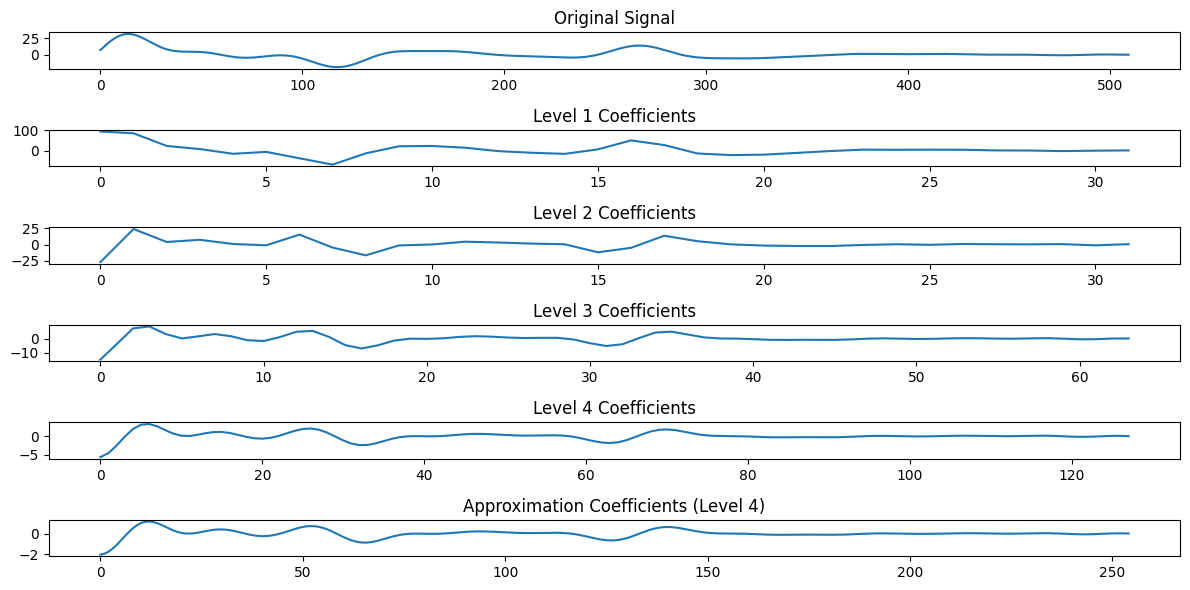

In [105]:
import pywt
# Wavelet decomposition
wavelet = 'db1'  # Choose a wavelet (Daubechies wavelet of order 1 in this case)
level = 4  # Number of decomposition levels
signal = df_blink["data"][0].T[0]  # Signal to be decomposed

coeffs = pywt.wavedec(signal, wavelet, level=level)

# Plot the original signal and its wavelet coefficients
plt.figure(figsize=(12, 6))
plt.subplot(level + 2, 1, 1)
plt.plot(signal)
plt.title('Original Signal')

for i in range(level):
    plt.subplot(level + 2, 1, i + 2)
    plt.plot(coeffs[i])
    plt.title(f'Level {i + 1} Coefficients')

plt.subplot(level + 2, 1, level + 2)
plt.plot(coeffs[level])
plt.title(f'Approximation Coefficients (Level {level})')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'short blink')

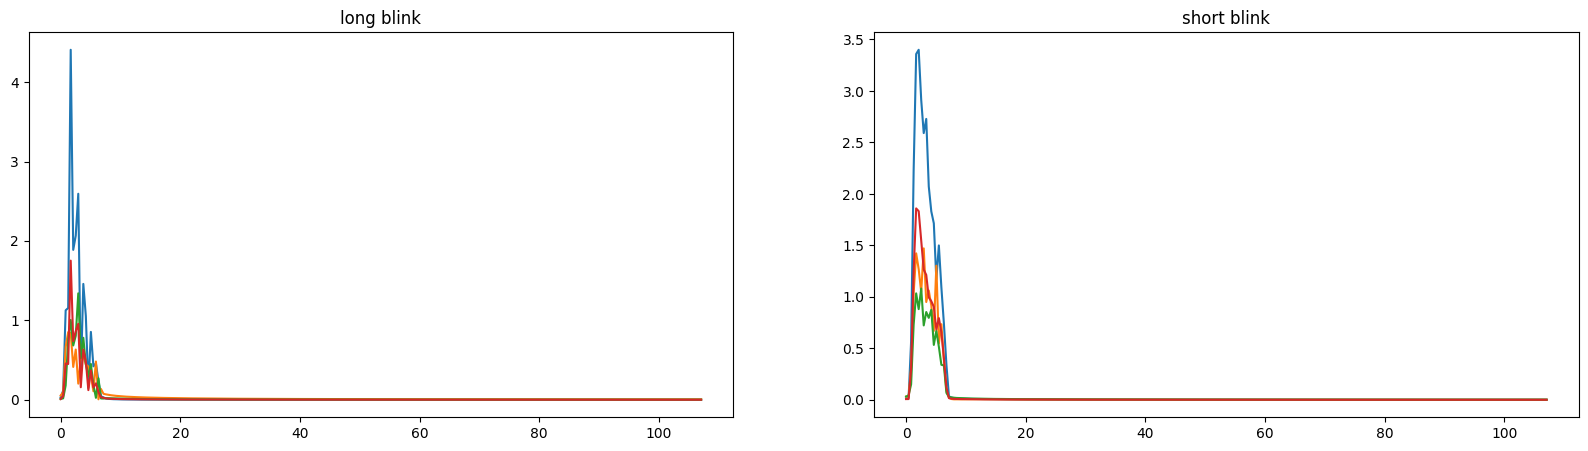

In [107]:
# Discrete Fourier transform
from scipy.fft import fft, fftfreq
# sample spacing: 2 lists long and short blink. Each list has 100 rows of data, each row has 4 columns, each column has 510 points of data
# frequency of long blink is less coherent than short blink
num = 20

T = 1.0 / 215.0
N = 510

label1 = "long blink"
yf11 = fft(list_long_blink[num]["ser1"].to_numpy())
xf11 = fftfreq(N, T)[:N//2]

yf12 = fft(list_long_blink[num]["ser2"].to_numpy())
xf12 = fftfreq(N, T)[:N//2]

yf13 = fft(list_long_blink[num]["ser3"].to_numpy())
xf13 = fftfreq(N, T)[:N//2]

yf14 = fft(list_long_blink[num]["ser4"].to_numpy())
xf14 = fftfreq(N, T)[:N//2]

label2 = "short blink"
yf21 = fft(list_short_blink[num]["ser1"].to_numpy())
xf21 = fftfreq(N, T)[:N//2]

yf22 = fft(list_short_blink[num]["ser2"].to_numpy())
xf22 = fftfreq(N, T)[:N//2]

yf23 = fft(list_short_blink[num]["ser3"].to_numpy())
xf23 = fftfreq(N, T)[:N//2]

yf24 = fft(list_short_blink[num]["ser4"].to_numpy())
xf24 = fftfreq(N, T)[:N//2]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
ax1.plot(xf11, 2.0/N * np.abs(yf11[0:N//2]))  # Plot some data on the axes.
ax1.plot(xf12, 1.0/N * np.abs(yf12[0:N//2]))  # Plot some data on the axes.
ax1.plot(xf13, 1.0/N * np.abs(yf13[0:N//2]))  # Plot some data on the axes.
ax1.plot(xf14, 1.0/N * np.abs(yf14[0:N//2]))  # Plot some data on the axes.
ax1.set_title(label1)
ax2.plot(xf21, 2.0/N * np.abs(yf21[0:N//2]))  # Plot some data on the axes.
ax2.plot(xf22, 1.0/N * np.abs(yf22[0:N//2]))  # Plot some data on the axes.
ax2.plot(xf23, 1.0/N * np.abs(yf23[0:N//2]))  # Plot some data on the axes.
ax2.plot(xf24, 1.0/N * np.abs(yf24[0:N//2]))  # Plot some data on the axes.
ax2.set_title(label2)


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LogisticRegression

X = df_blink["data"]
y = df_blink["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [ ]:

kf=KFold(n_splits=5, random_state=1, shuffle=True)
score=cross_validate(LogisticRegression(solver="liblinear", random_state= 0),X,y,cv=kf, scoring = ['accuracy','f1_macro','precision','recall'])

print('Accuracy: %.4f (std: %.3f)' % (np.mean(score['test_accuracy']), np.std(score['test_accuracy'])))
print('F1 Score : %.4f' % (np.mean(score['test_f1_macro'])))
print('Precision : %.4f' % (np.mean(score['test_precision'])))
print('Recall : %.4f' % (np.mean(score['test_recall'])))


**Wavelet Decomposition**

In [ ]:
time_list=[]
for i in range (1,6):
    time=(time_sig_dic[Raw_data_paths[i][-15:-4]].index.values[-1])
    time_list.append(time)
data=np.array(time_list)
time_length=pd.DataFrame(data=data,columns=['Signl length'])
time_length

In [ ]:
#Independent Component Analysis (ICA) for artifact removal
